# 숫자 이미지를 만들기위한 작업
## shift(5방향)

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
data_path = './data/font'
data_folder = os.listdir(data_path)
data_folder_list = []
for data in data_folder:
    data_folder_list.append(f'{data_path}/{data}')

In [4]:
font1_list = []
for img_name in os.listdir(data_folder_list[0]):
    font1_list.append(f'{data_folder_list[0]}/{img_name}')

In [14]:
gray_img = cv2.imread(font1_list[0], cv2.IMREAD_GRAYSCALE)

### shift 해줄때 배경부분이 까맣게되는걸 막기위한 사전처리

In [15]:
for y in range(gray_img.shape[0]):
    for x in range(gray_img.shape[1]):
        # 검은색은 0인데 이걸 일단 1로 바꿔둠
        if gray_img[y][x] == 0:
            gray_img[y][x] = 1

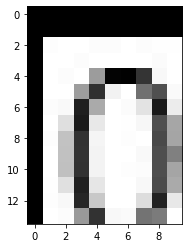

In [16]:
# 변환 행렬, X축으로 10 Y축으로 20 이동
M = np.float32([[1,0,1],[0,1,2]])
shift_img = cv2.warpAffine(gray_img, M,(gray_img.shape[1], gray_img.shape[0]))
plt.imshow(shift_img, 'gray')

### 0을 255로 바꿔줌

In [17]:
for y in range(shift_img.shape[0]):
    for x in range(shift_img.shape[1]):
        if shift_img[y][x] == 0:
            shift_img[y][x] = 255
        if shift_img[y][x] == 1:
            shift_img[y][x] = 0

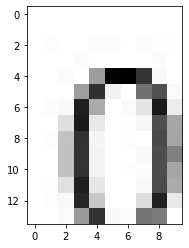

In [18]:
plt.imshow(shift_img, 'gray')

### 함수화

In [19]:
def shift_img(img, x_shift, y_shift):
    gray_img = img
    for y in range(gray_img.shape[0]):
        for x in range(gray_img.shape[1]):
            # 검은색은 0인데 이걸 일단 1로 바꿔둠
            if gray_img[y][x] == 0:
                gray_img[y][x] = 1
    # 변환 행렬, x축으로 x_sshift
    M = np.float32([[1,0,x_shift],[0,1,y_shift]])
    shift_img = cv2.warpAffine(gray_img, M,(gray_img.shape[1], gray_img.shape[0]))
    for y in range(shift_img.shape[0]):
        for x in range(shift_img.shape[1]):
            if shift_img[y][x] == 0:
                shift_img[y][x] = 255
            if shift_img[y][x] == 1:
                shift_img[y][x] = 0
    return shift_img

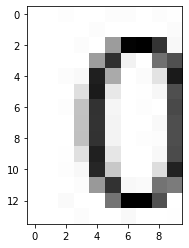

In [20]:
gray_img = cv2.imread(font1_list[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(shift_img(gray_img, 2, 0), 'gray')

## blur(3가지)

In [21]:
def blur_img(img_path, scale):
    gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return cv2.blur(gray_img, (scale,scale))

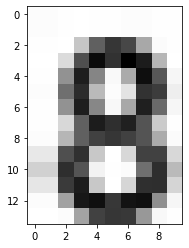

In [22]:
plt.imshow(blur_img(font1_list[8], 2), 'gray')

## 흐리게(
- 그냥 적당히 특정 값을 곱해줌

In [19]:
import random

In [57]:
for y in range(gray_img.shape[0]):
    for x in range(gray_img.shape[1]):
        gray_img[y][x] = min(255, gray_img[y][x] + random.randint(1,30))

In [30]:
gray_img = cv2.imread(gothic_list[0], cv2.IMREAD_GRAYSCALE)

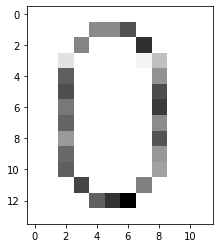

In [58]:
plt.imshow(gray_img, 'gray')

In [21]:
random.randint(1,10)

9

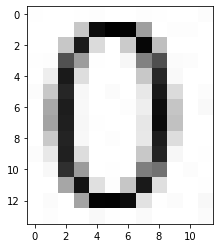

In [11]:
plt.imshow(gray_img, 'gray')

In [18]:
gray_img

array([[254, 255, 255, 254, 253, 255, 255, 253, 254, 255, 255, 252],
       [255, 255, 255, 199,  12,   0,   2, 158, 255, 253, 253, 255],
       [255, 255, 199,  27, 219, 255, 203,   6, 191, 255, 255, 255],
       [254, 253,  82, 156, 254, 255, 247, 129,  79, 251, 252, 255],
       [255, 238,  26, 222, 255, 255, 255, 200,  39, 249, 255, 255],
       [252, 200,  38, 247, 255, 251, 255, 232,  25, 219, 255, 252],
       [255, 168,  29, 248, 255, 255, 253, 238,  14, 197, 255, 249],
       [255, 163,  31, 247, 254, 255, 255, 231,  11, 193, 255, 255],
       [255, 201,  35, 248, 255, 253, 255, 232,  29, 221, 255, 255],
       [252, 232,  32, 221, 255, 255, 255, 200,  36, 247, 255, 254],
       [255, 248,  47, 155, 255, 254, 255, 126, 113, 255, 252, 255],
       [255, 255, 166,  19, 224, 253, 198,  25, 223, 255, 255, 254],
       [255, 251, 255, 163,   3,   2,  12, 226, 254, 251, 255, 248],
       [255, 253, 255, 255, 249, 254, 255, 250, 255, 255, 255, 251]],
      dtype=uint8)

In [ ]:
cv2.GaussianNo

In [434]:
def noise_img(img_path, scale):
    gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return gray_img * scale

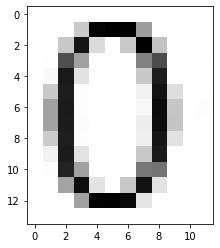

In [17]:
plt.imshow(cv2.bilateralFilter(gray_img, 10, 10, 10), 'gray')

In [ ]:
cv2.ga

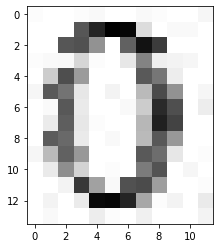

In [437]:
plt.imshow(noise_img(gothic_list[0], 3), 'gray')

## 폰트(고딕, 굴림, 궁서)

## 숫자 합치기
- np.concat

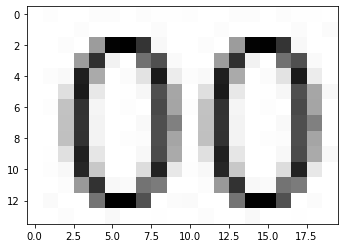

In [24]:
plt.imshow(np.concatenate((shift_img(gray_img, 1, 0), gray_img), axis = 1), 'gray')

### 두 자리 - 세 자리 숫자를 만들도록 함(뒤에 0.5를 붙이는건 옵션)

In [25]:
data_folder_list

['./data/font/font1', './data/font/font2', './data/font/font3']

In [34]:
data_path = './data/font'
data_folder = os.listdir(data_path)
data_folder_list = []
for data in data_folder:
    data_folder_list.append(f'{data_path}/{data}')
#     print(os.listdir(data))
    
fonts_list = []
save_list = []
for font_ in data_folder_list:
    font_list = []
    for img_name in os.listdir(font_):
        if '.jpg' in img_name:
            font_list.append(f'{font_}/{img_name}')
        else:
            save_list.append(f'{font_}/{img_name}')
    fonts_list.append(font_list)

### 0-gothic 1-gulim  2-gungsuh

In [35]:
save_list

['./data/font/font1/char', './data/font/font2/char', './data/font/font3/char']

In [36]:
fonts_list[0]

['./data/font/font1/0.jpg',
 './data/font/font1/1.jpg',
 './data/font/font1/2.jpg',
 './data/font/font1/3.jpg',
 './data/font/font1/4.jpg',
 './data/font/font1/5.jpg',
 './data/font/font1/6.jpg',
 './data/font/font1/7.jpg',
 './data/font/font1/8.jpg',
 './data/font/font1/9.jpg',
 './data/font/font1/d.jpg']

In [191]:
first_num = fonts_list[0][1:-1]

In [262]:
second_num = fonts_list[0][0:-1]

In [251]:
# 0.5 이미지를 만들어 둠
dot_img1 = cv2.imread(fonts_list[0][-1], cv2.IMREAD_GRAYSCALE)
dot_img2 = cv2.imread(fonts_list[0][5], cv2.IMREAD_GRAYSCALE)

dot_img = np.concatenate((dot_img1, shift_img(dot_img2, -4, 0)), axis = 1)

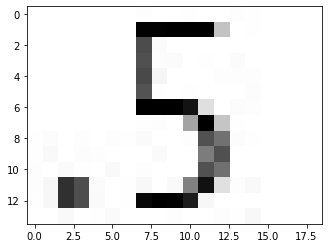

In [252]:
plt.imshow(dot_img, 'gray')

In [263]:
class num_info:
    def __init__(self,img, label):
        self.img = img
        self.label = label

In [275]:
one_img = cv2.imread(first_num[0], cv2.IMREAD_GRAYSCALE)

In [264]:
%%time
double_list = []
for first in first_num:
    first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
    for second in second_num:
        second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)
        label = first[-5] + second[-5]
        img = np.concatenate((shift_img(first_img, 2, 0), second_img), axis = 1)
        for i in range(2):
            if i % 2 == 0:
                pass
            else:
                img = np.concatenate((img, shift_img(dot_img, -2, 0)), axis = 1)
                label += 'd5'
            double_list.append(num_info(img, label))        

Wall time: 340 ms


C:\ProgramData\Anaconda3\envs\tmh_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


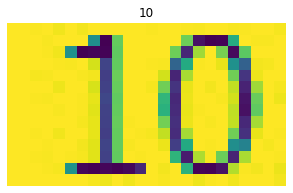

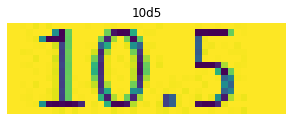

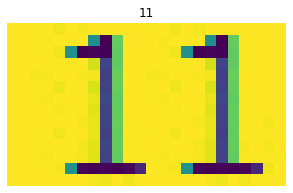

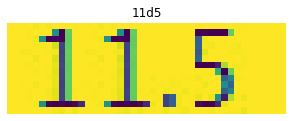

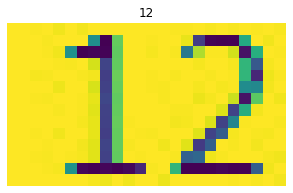

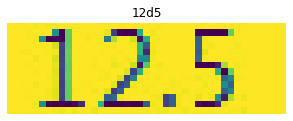

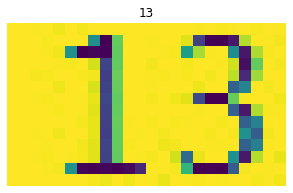

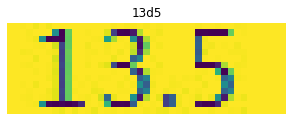

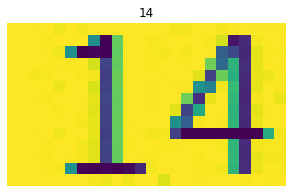

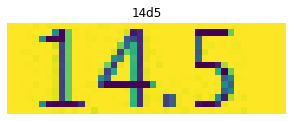

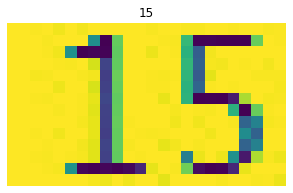

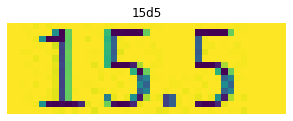

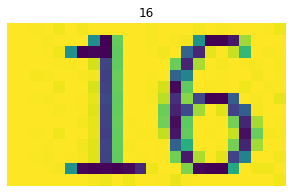

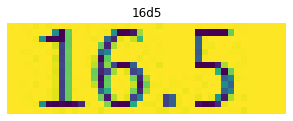

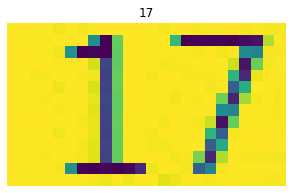

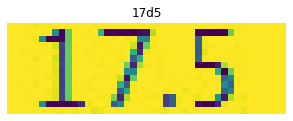

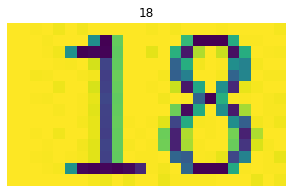

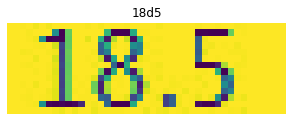

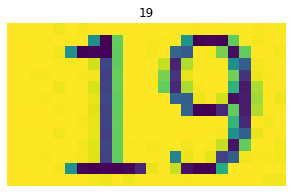

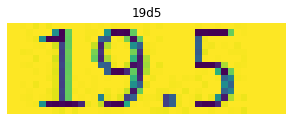

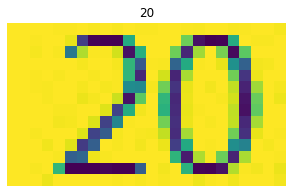

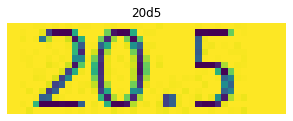

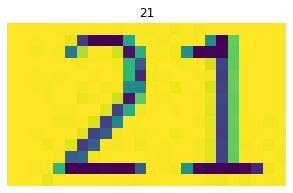

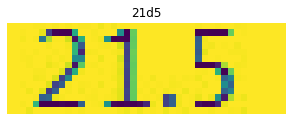

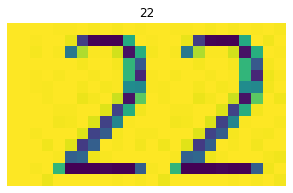

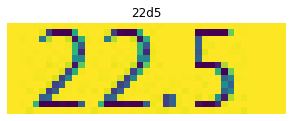

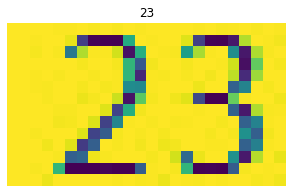

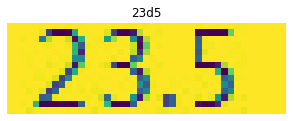

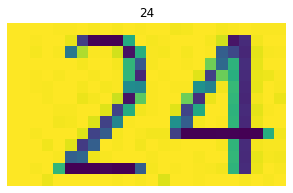

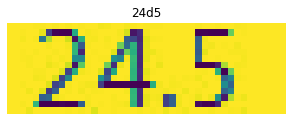

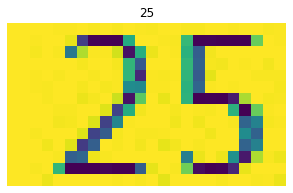

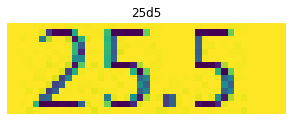

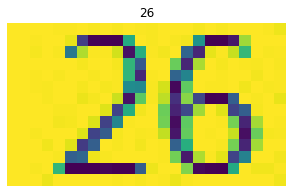

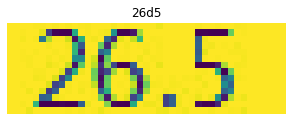

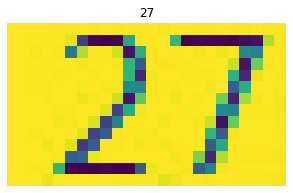

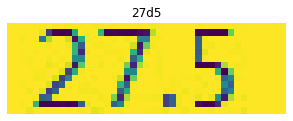

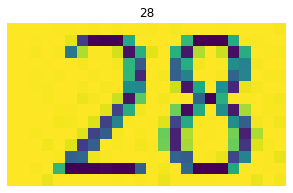

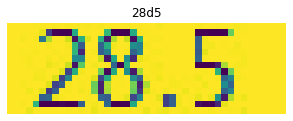

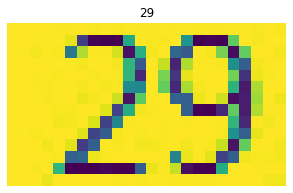

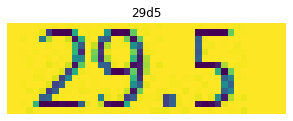

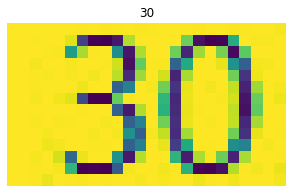

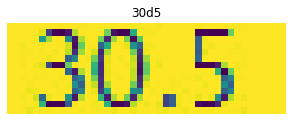

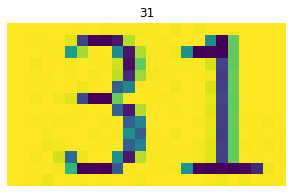

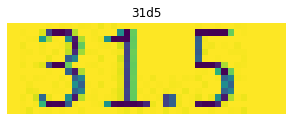

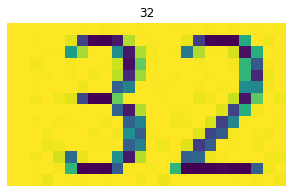

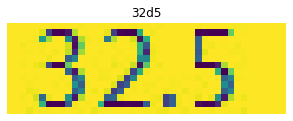

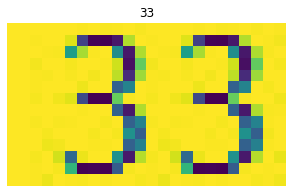

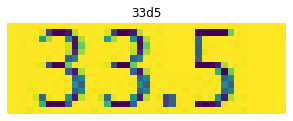

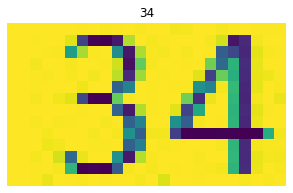

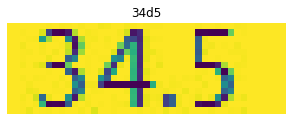

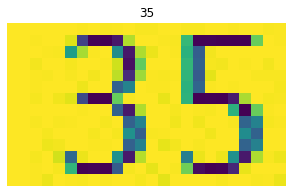

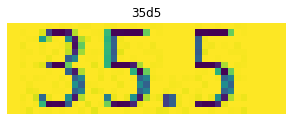

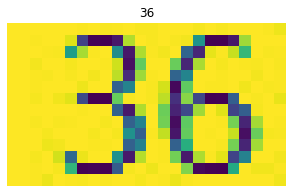

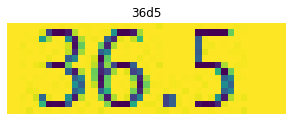

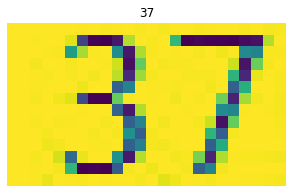

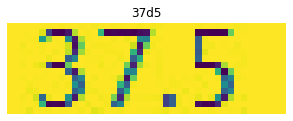

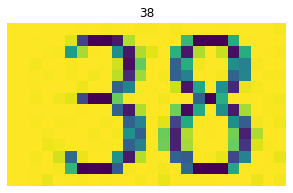

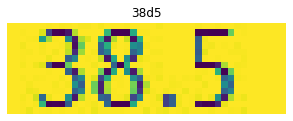

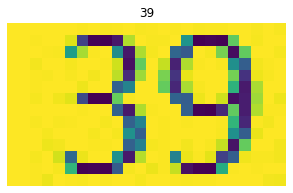

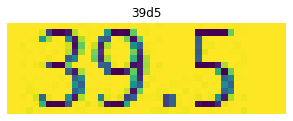

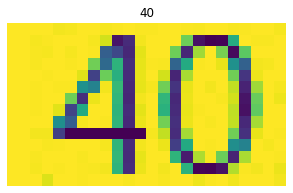

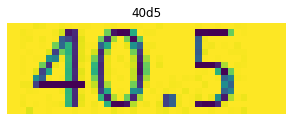

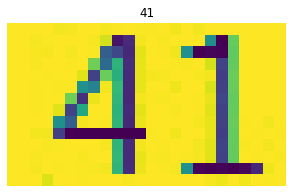

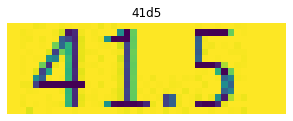

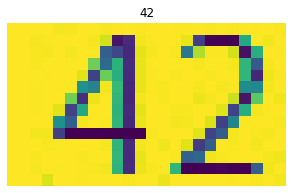

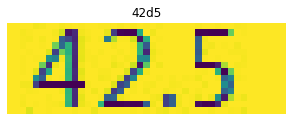

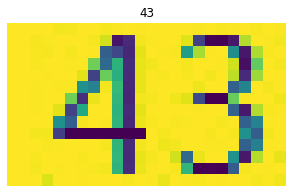

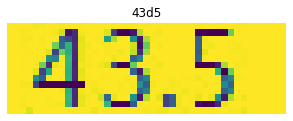

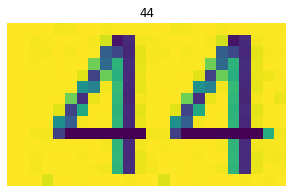

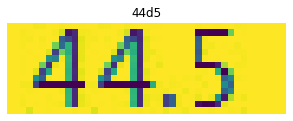

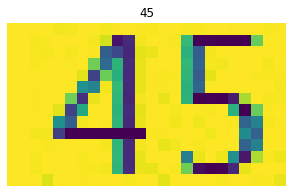

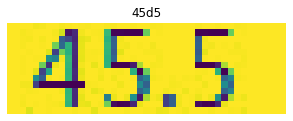

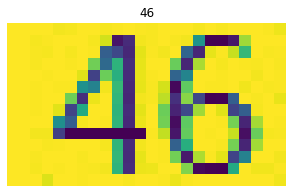

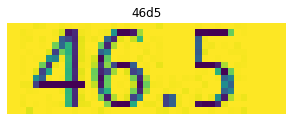

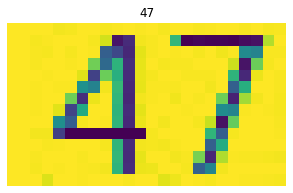

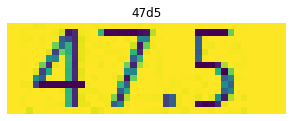

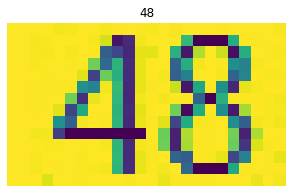

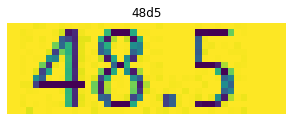

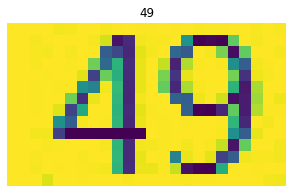

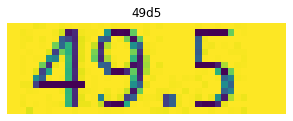

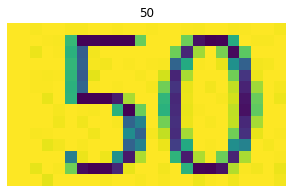

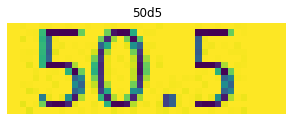

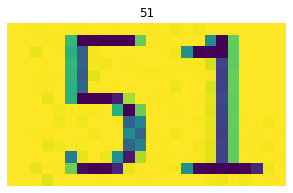

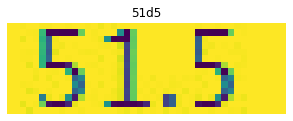

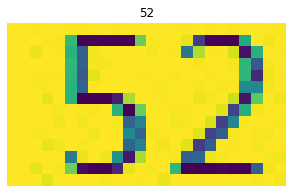

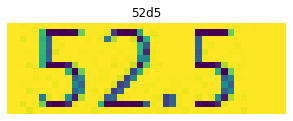

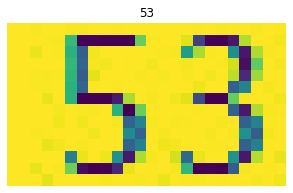

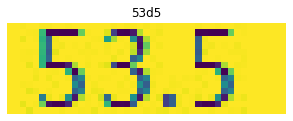

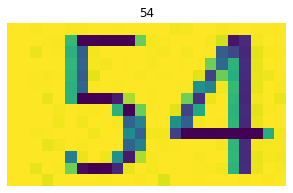

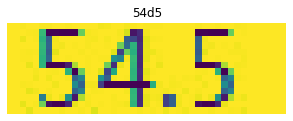

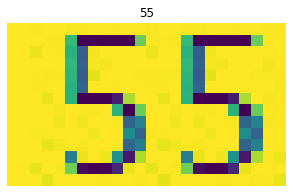

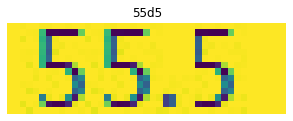

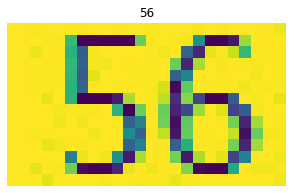

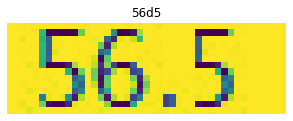

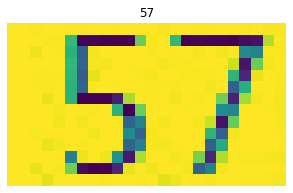

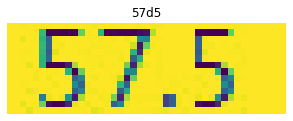

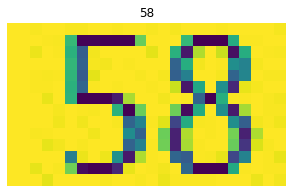

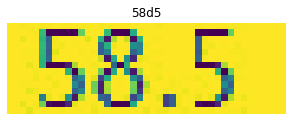

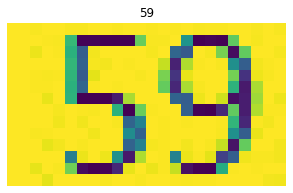

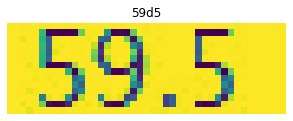

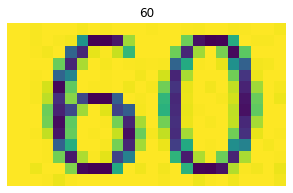

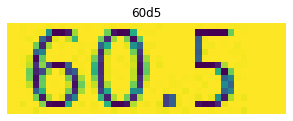

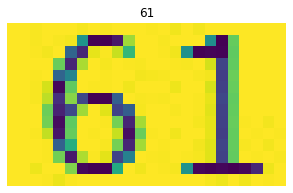

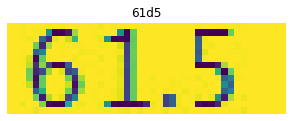

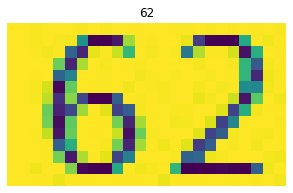

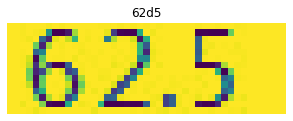

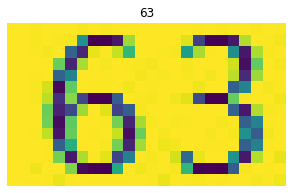

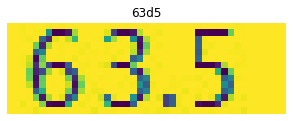

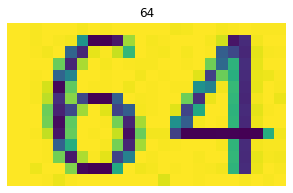

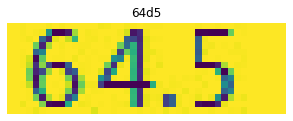

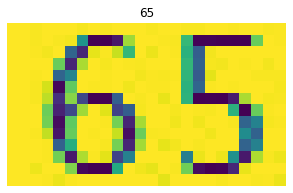

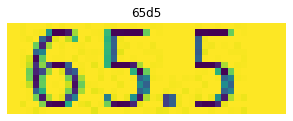

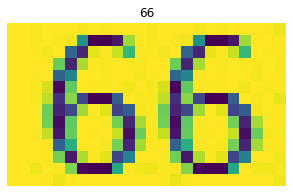

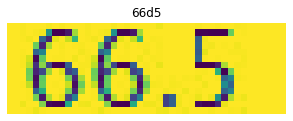

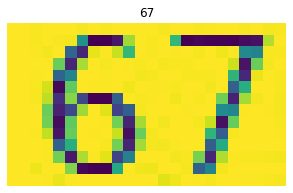

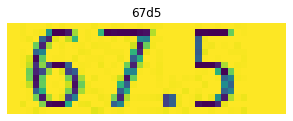

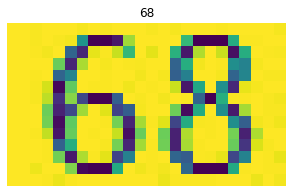

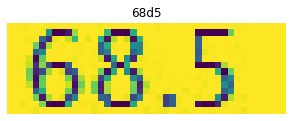

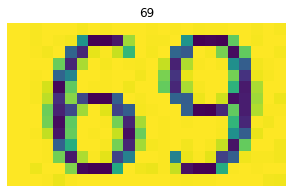

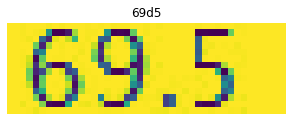

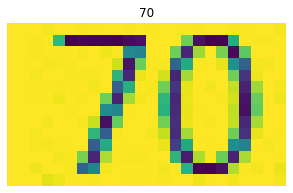

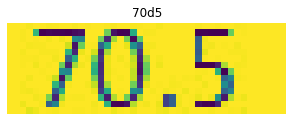

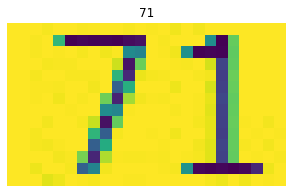

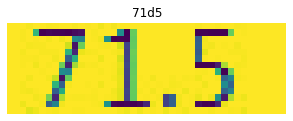

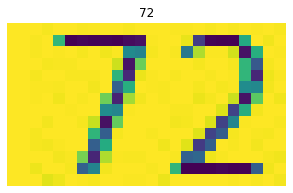

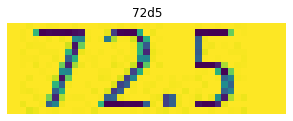

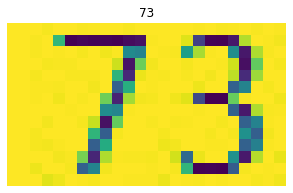

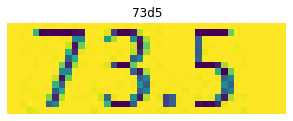

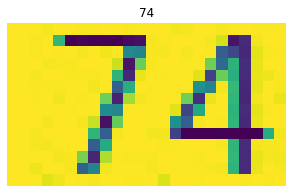

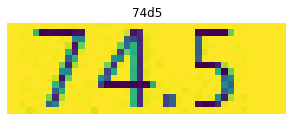

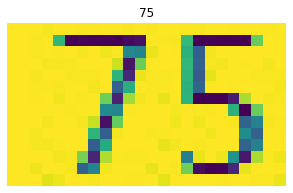

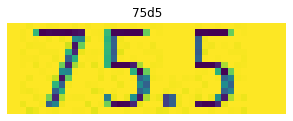

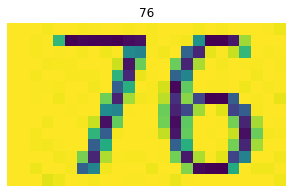

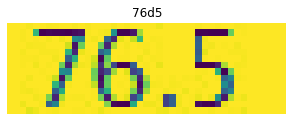

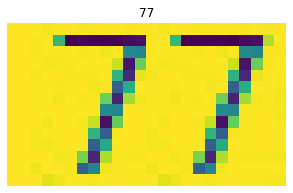

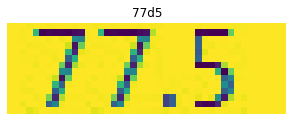

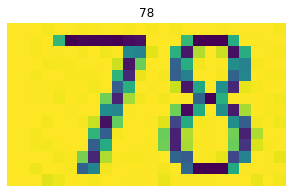

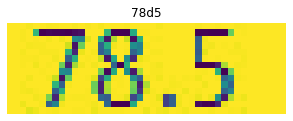

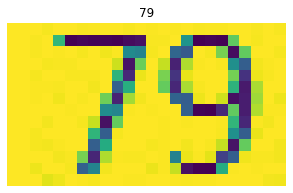

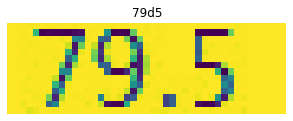

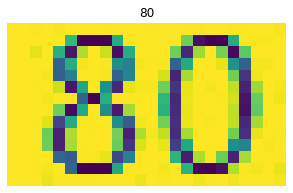

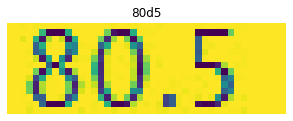

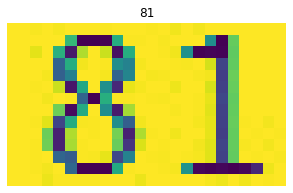

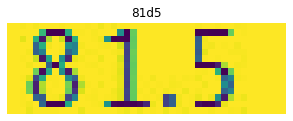

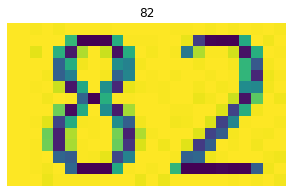

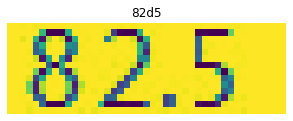

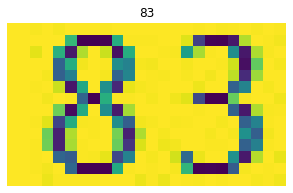

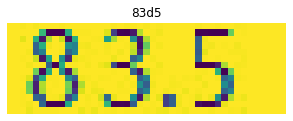

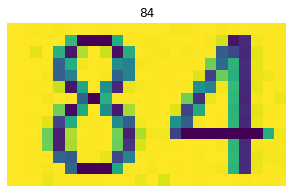

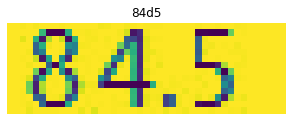

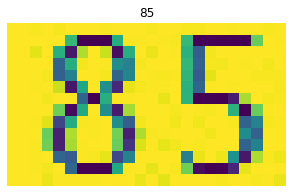

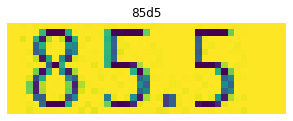

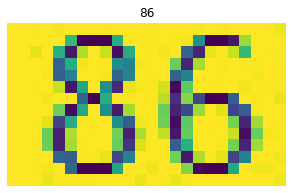

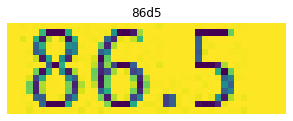

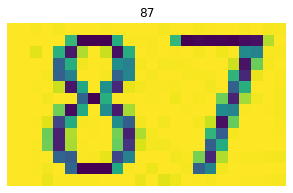

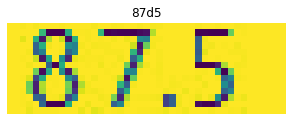

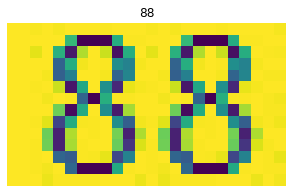

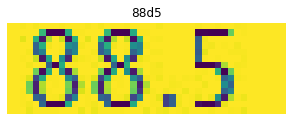

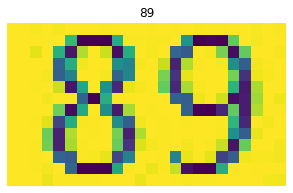

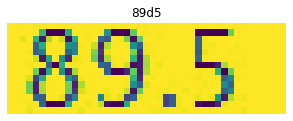

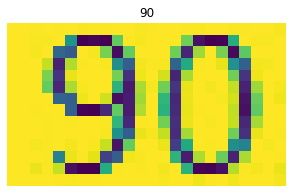

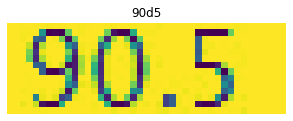

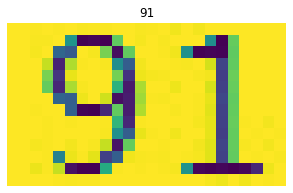

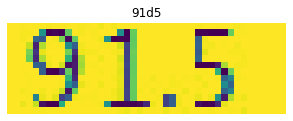

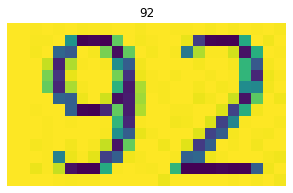

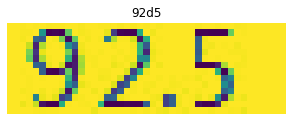

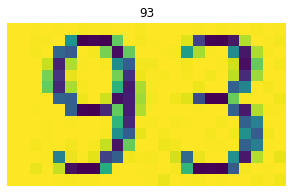

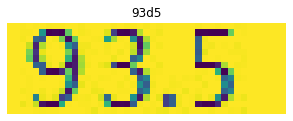

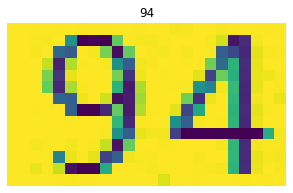

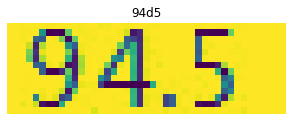

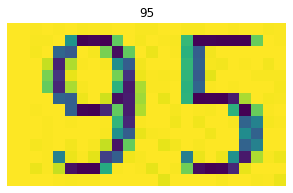

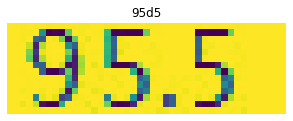

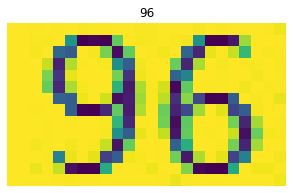

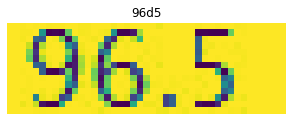

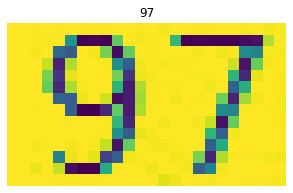

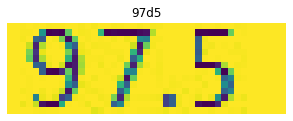

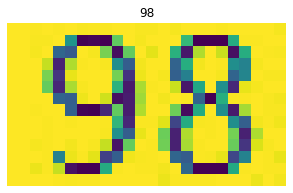

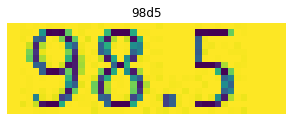

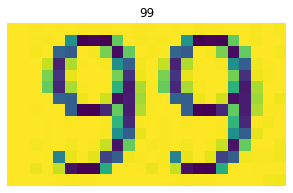

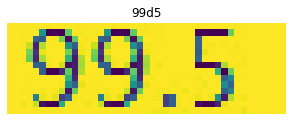

In [265]:
for num in double_list:
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    plt.title(f'{num.label}')
    axes.imshow(num.img)
    axes.axis('off')

### 한 자리 숫자

In [37]:
class num_info:
    def __init__(self,img, label):
        self.img = img
        self.label = label

In [38]:
%%time
font_one_list = []
for font in fonts_list:
    first_num = font[:]    
    one_list = []
    for first in first_num:
        first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
        label = first[-5]
        one_list.append(num_info(first_img, label))   
    font_one_list.append(one_list)

Wall time: 169 ms


In [39]:
print(f'len(font_one_list) : {len(font_one_list)}')
print(f'len(font_one_list[0]) : {len(font_one_list[0])}')

len(font_one_list) : 3
len(font_one_list[0]) : 11


### 두 자리 숫자

In [368]:
%%time
font_doube_list = []
for font in fonts_list:
    first_num = font[1:-1]
    second_num = font[0:-1]
    # 0.5 이미지를 만들어 둠
    dot_img1 = cv2.imread(font[-1], cv2.IMREAD_GRAYSCALE)
    dot_img2 = cv2.imread(font[5], cv2.IMREAD_GRAYSCALE)
    dot_img = np.concatenate((dot_img1, shift_img(dot_img2, -4, 0)), axis = 1)
    
    double_list = []
    for first in first_num:
        first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
        for second in second_num:
            second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)
            label = first[-5] + second[-5]
            img = np.concatenate((shift_img(first_img, 2, 0), second_img), axis = 1)
            for i in range(2):
                if i % 2 == 0:
                    pass
                else:
                    img = np.concatenate((img, shift_img(dot_img, -2, 0)), axis = 1)
                    label += 'd5'
                double_list.append(num_info(img, label))   
    font_doube_list.append(double_list)

Wall time: 976 ms


In [369]:
print(f'len(font_doube_list) : {len(font_doube_list)}')
print(f'len(font_doube_list[0]) : {len(font_doube_list[0])}')

len(font_doube_list) : 3
len(font_doube_list[0]) : 180


C:\ProgramData\Anaconda3\envs\tmh_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


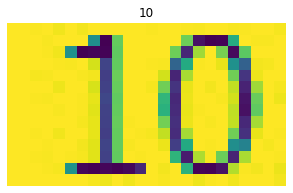

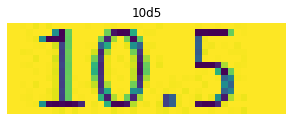

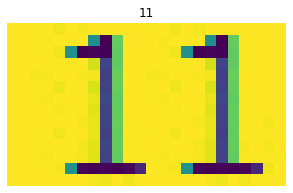

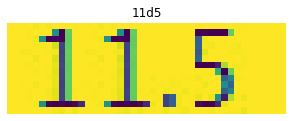

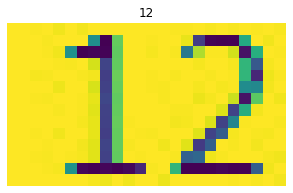

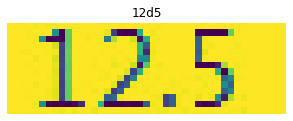

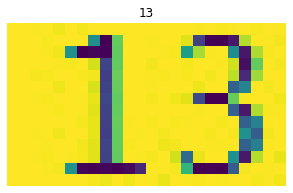

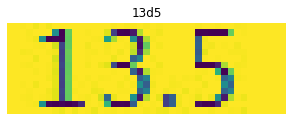

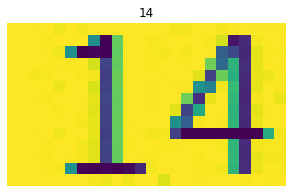

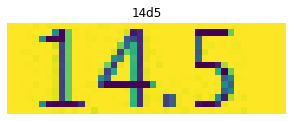

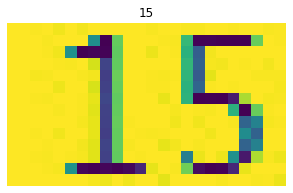

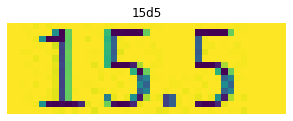

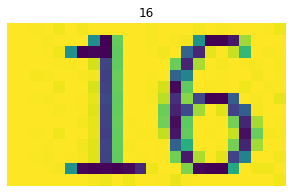

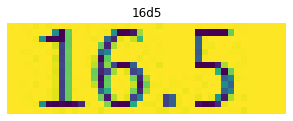

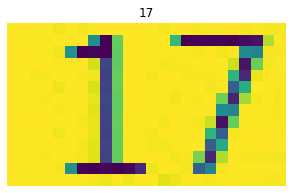

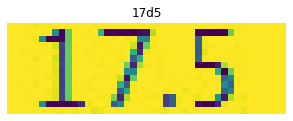

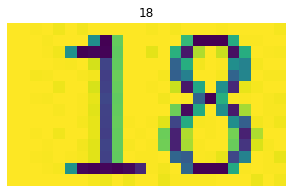

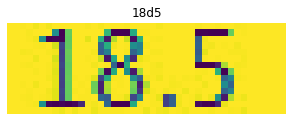

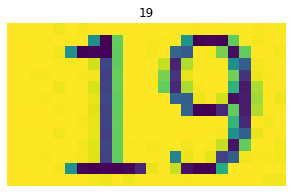

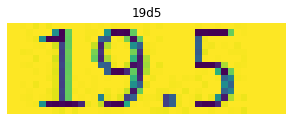

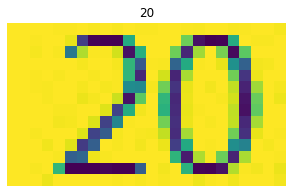

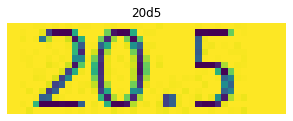

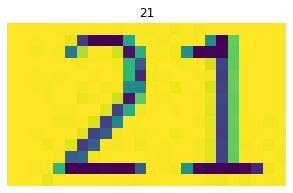

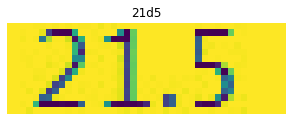

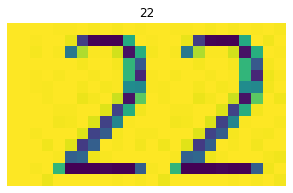

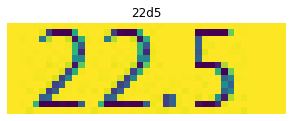

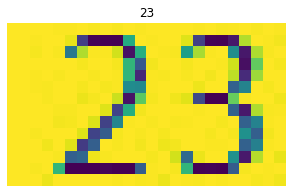

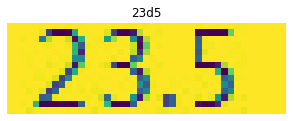

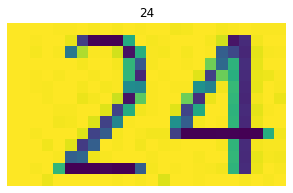

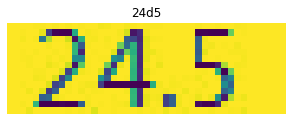

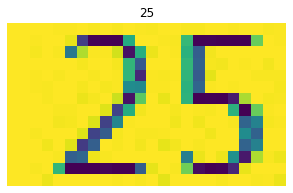

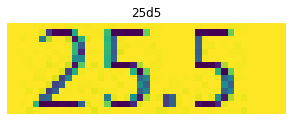

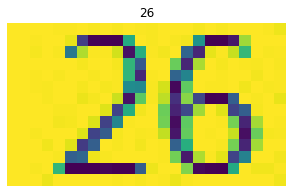

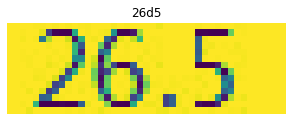

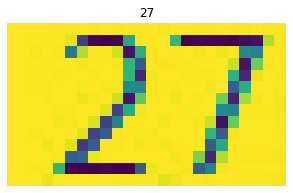

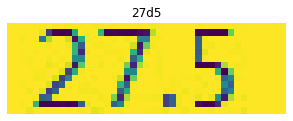

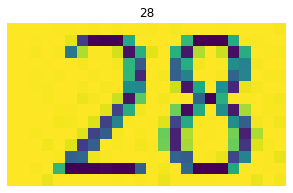

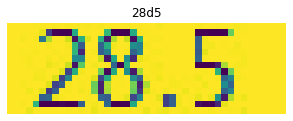

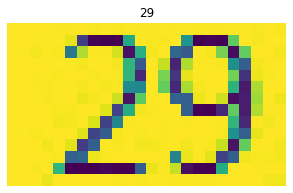

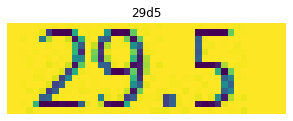

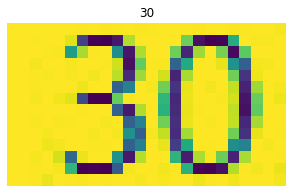

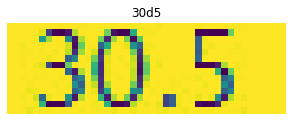

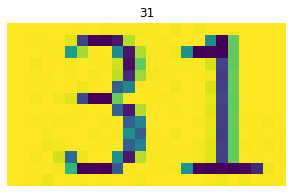

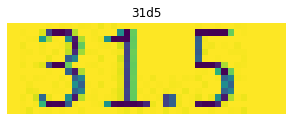

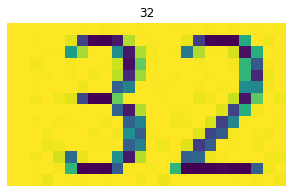

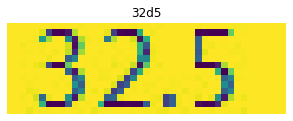

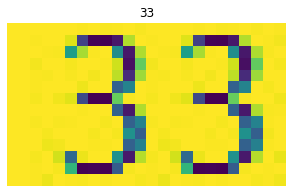

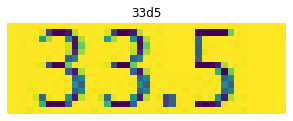

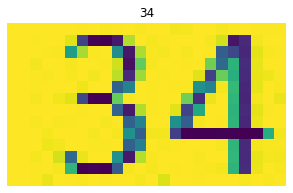

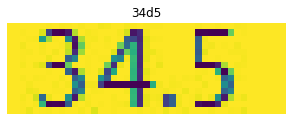

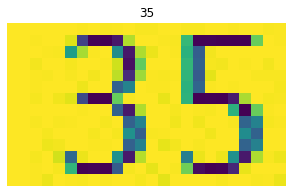

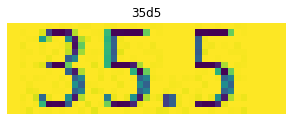

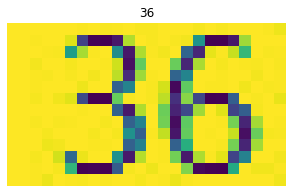

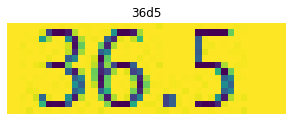

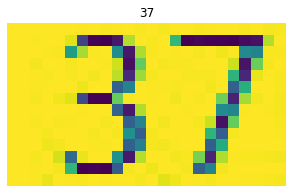

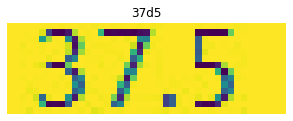

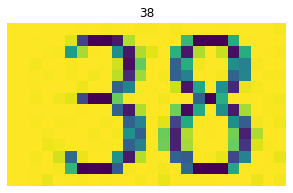

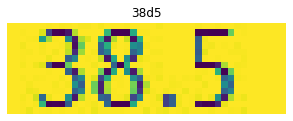

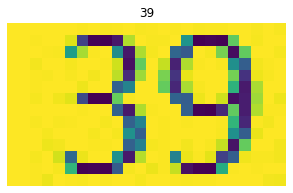

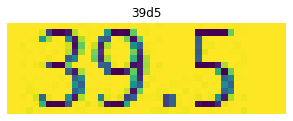

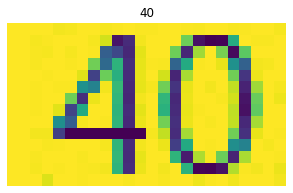

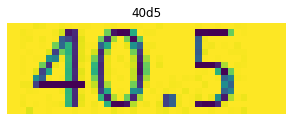

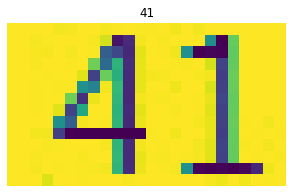

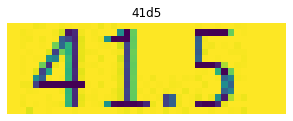

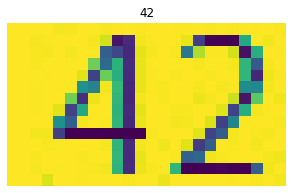

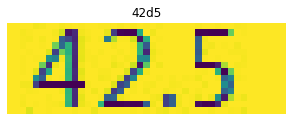

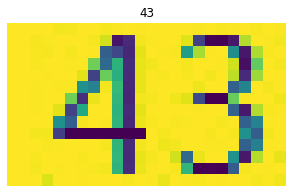

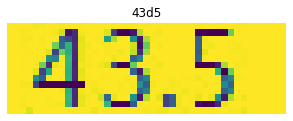

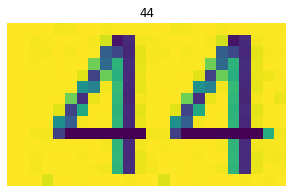

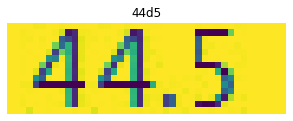

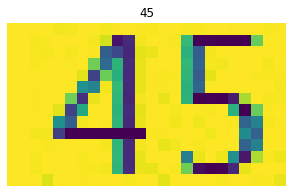

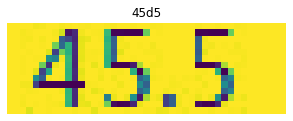

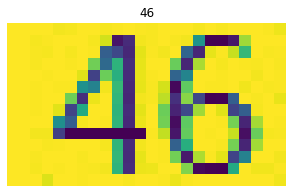

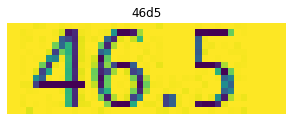

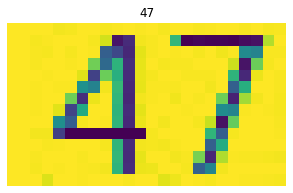

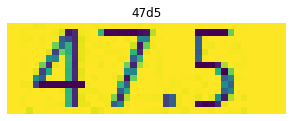

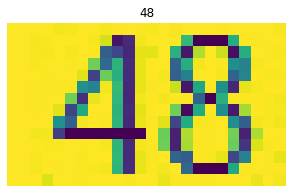

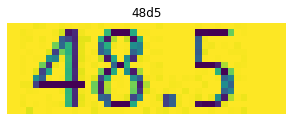

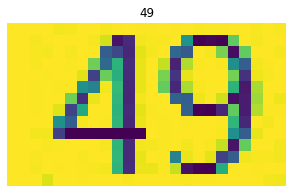

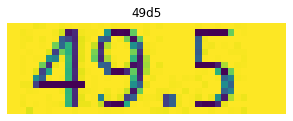

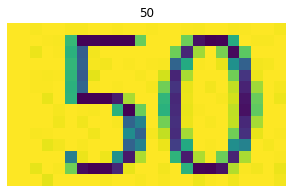

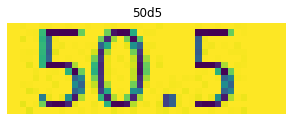

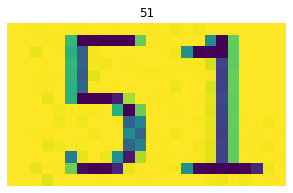

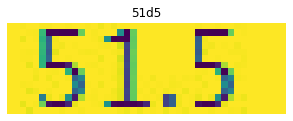

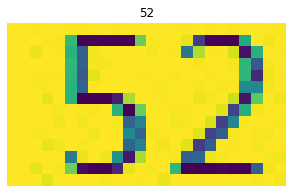

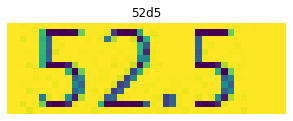

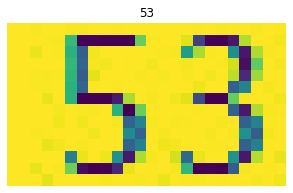

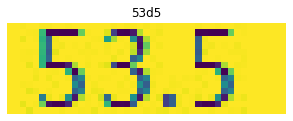

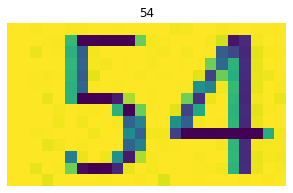

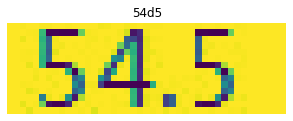

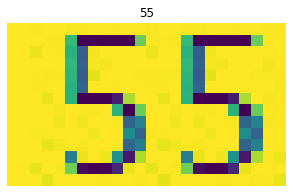

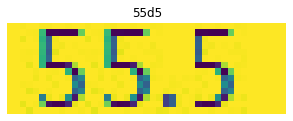

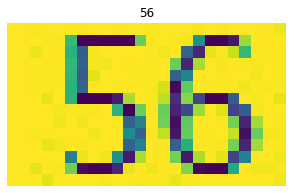

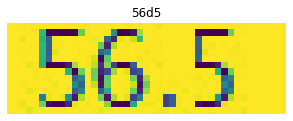

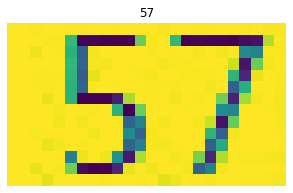

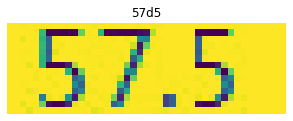

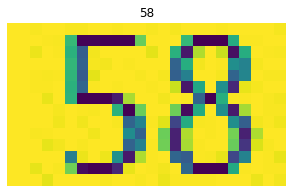

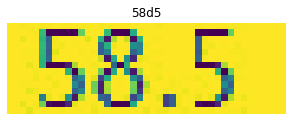

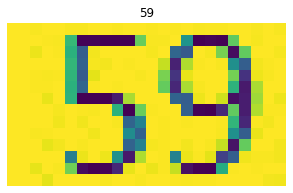

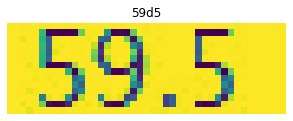

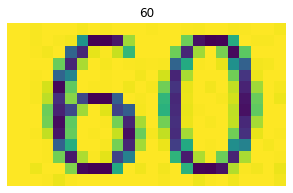

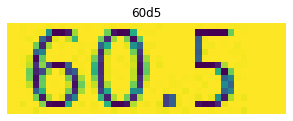

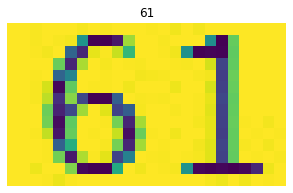

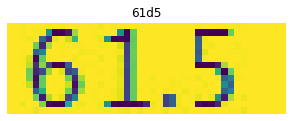

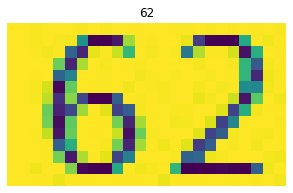

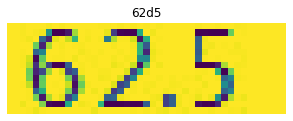

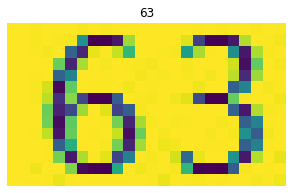

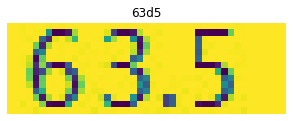

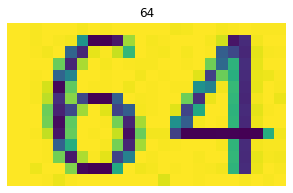

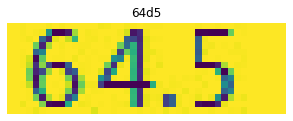

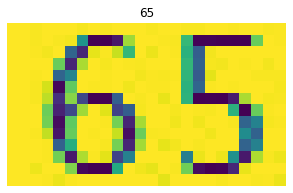

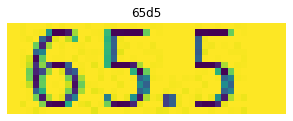

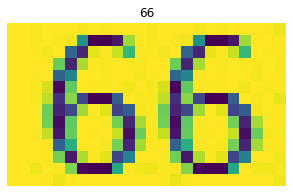

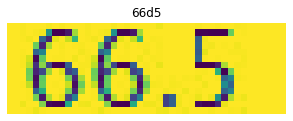

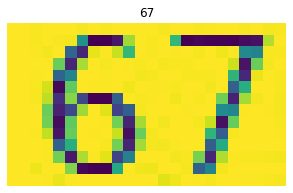

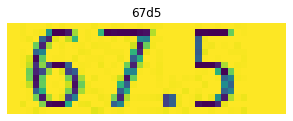

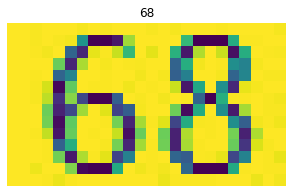

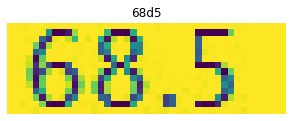

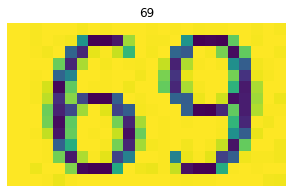

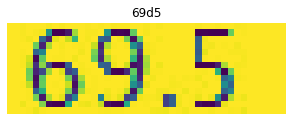

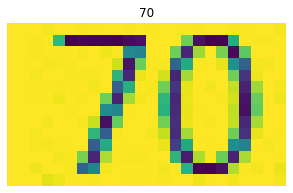

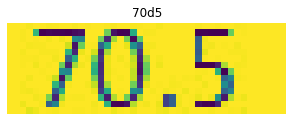

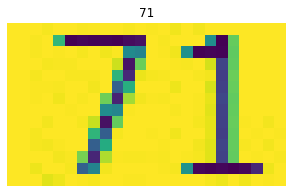

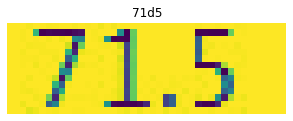

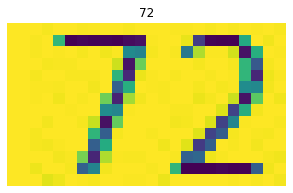

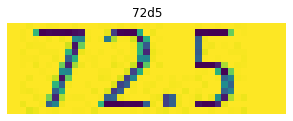

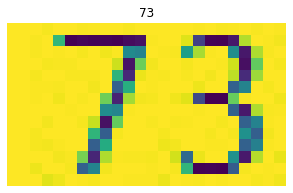

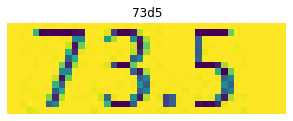

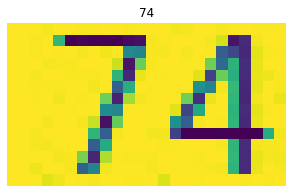

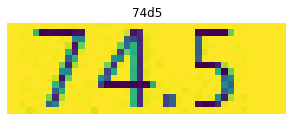

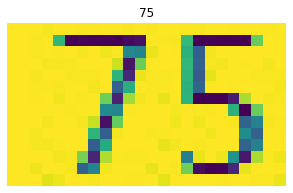

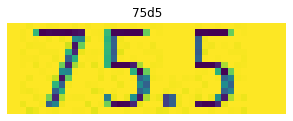

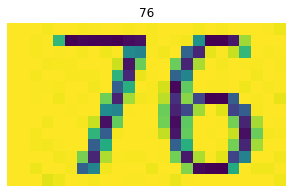

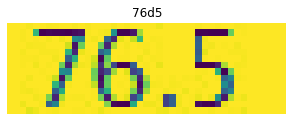

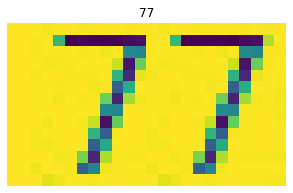

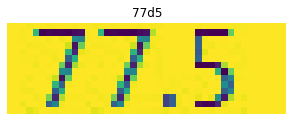

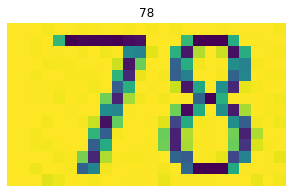

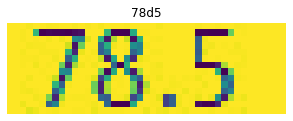

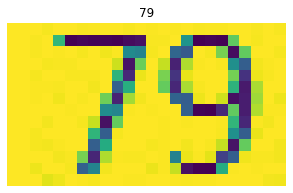

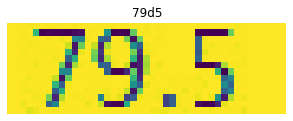

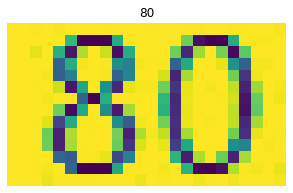

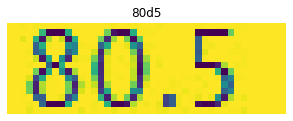

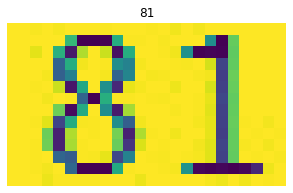

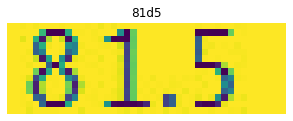

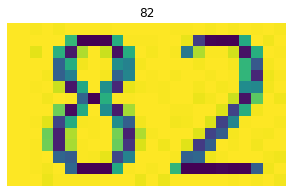

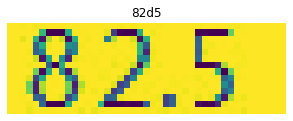

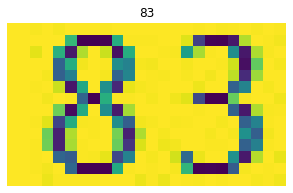

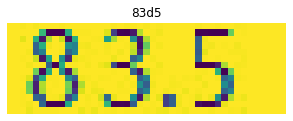

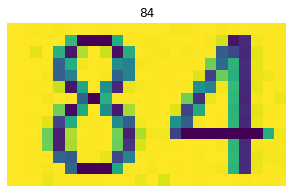

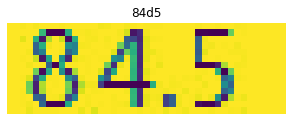

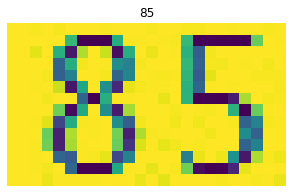

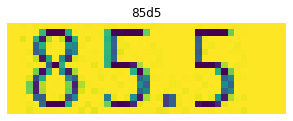

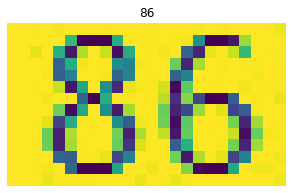

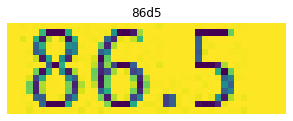

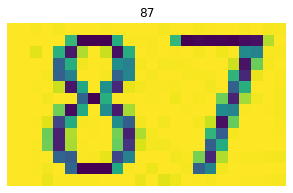

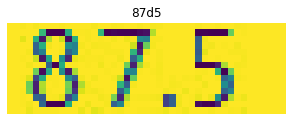

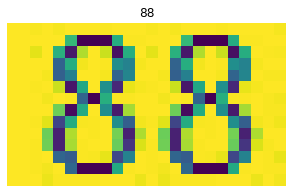

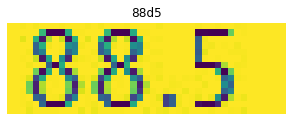

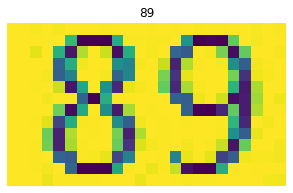

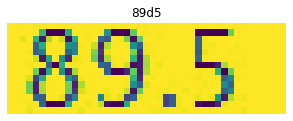

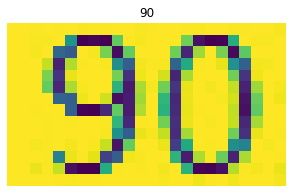

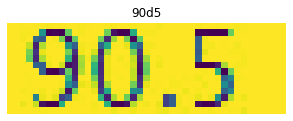

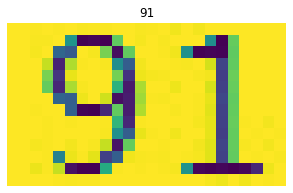

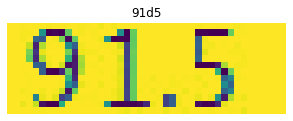

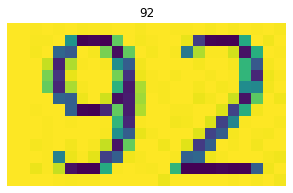

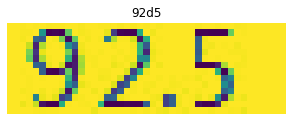

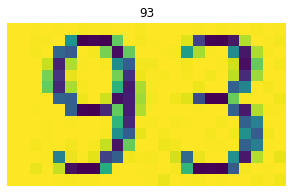

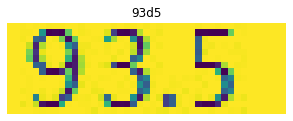

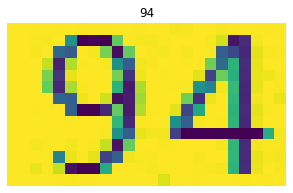

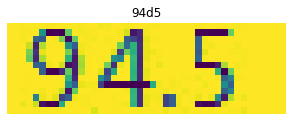

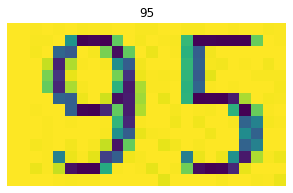

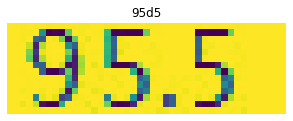

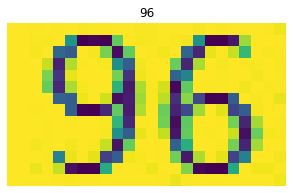

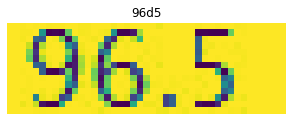

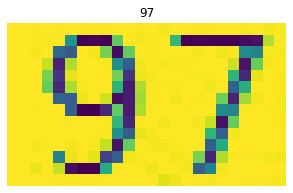

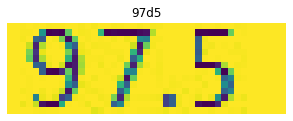

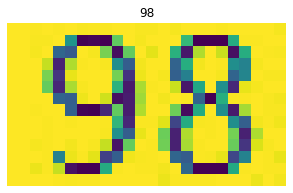

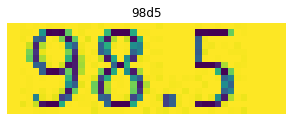

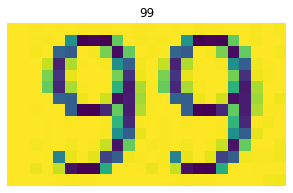

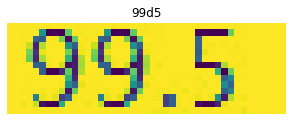

In [370]:
for num in font_doube_list[0]:
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    plt.title(f'{num.label}')
    axes.imshow(num.img)
    axes.axis('off')

### 세 자리 숫자

In [371]:
%%time
font_triple_list = []
for font in fonts_list:
    first_num = font[1]
    second_num = font[0:-1]
    third_num = font[0:-1]
    # 0.5 이미지를 만들어 둠
    dot_img1 = cv2.imread(font[-1], cv2.IMREAD_GRAYSCALE)
    dot_img2 = cv2.imread(font[5], cv2.IMREAD_GRAYSCALE)
    dot_img = np.concatenate((dot_img1, shift_img(dot_img2, -4, 0)), axis = 1)
    
    triple_list = []
    first = first_num
    first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
    for second in second_num:
        second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)
        seoncd_label = first[-5] + second[-5]
        double_img = np.concatenate((shift_img(first_img, 2, 0), second_img), axis = 1)
        for third in third_num:
            third_img = cv2.imread(third, cv2.IMREAD_GRAYSCALE)
            triple_label = seoncd_label + third[-5]
            triple_img = np.concatenate((double_img, shift_img(third_img, -2, 0)), axis = 1)
            for i in range(2):
                if i % 2 == 0:
                    label = triple_label
                    img = triple_img
                    pass
                else:
                    img = np.concatenate((triple_img, shift_img(dot_img, -2, 0)), axis = 1)
                    label = triple_label + 'd5'
                triple_list.append(num_info(img, label))   
    font_triple_list.append(triple_list)

Wall time: 1.12 s


In [372]:
print(f'len(font_triple_list) : {len(font_triple_list)}')
print(f'len(font_triple_list[0]) : {len(font_triple_list[0])}')

len(font_triple_list) : 3
len(font_triple_list[0]) : 200


C:\ProgramData\Anaconda3\envs\tmh_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


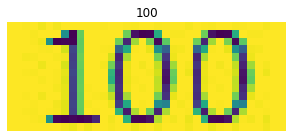

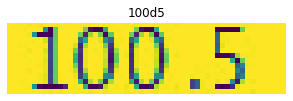

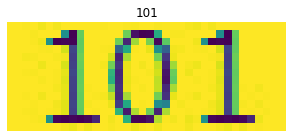

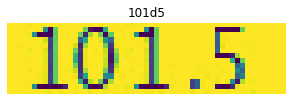

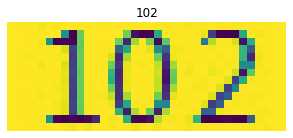

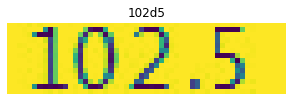

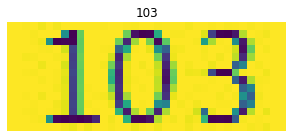

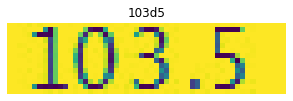

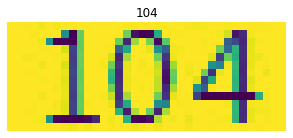

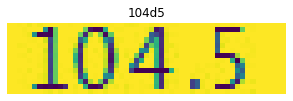

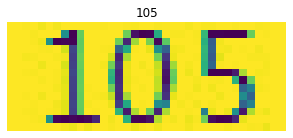

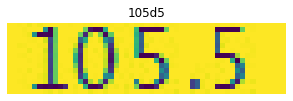

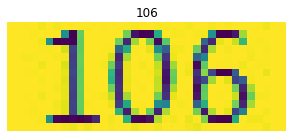

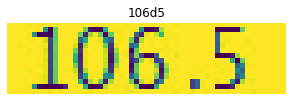

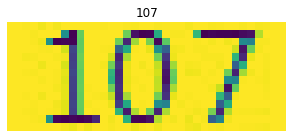

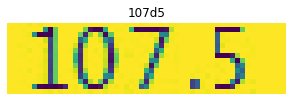

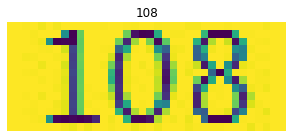

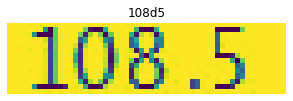

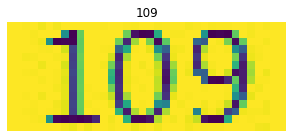

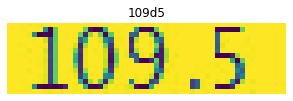

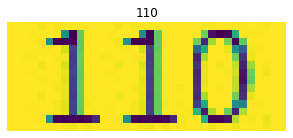

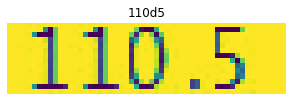

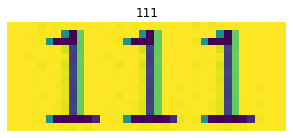

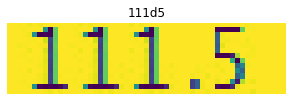

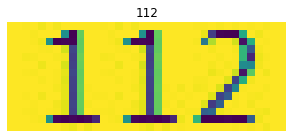

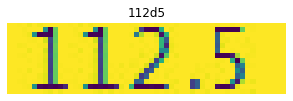

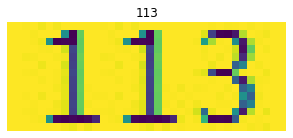

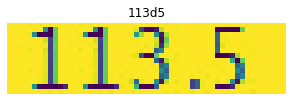

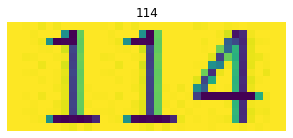

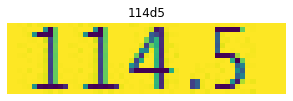

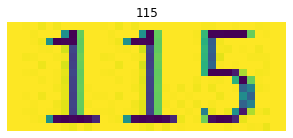

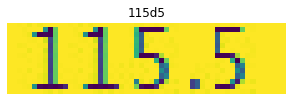

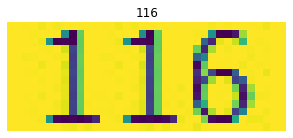

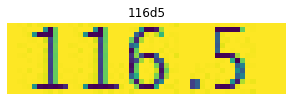

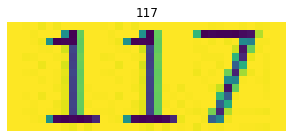

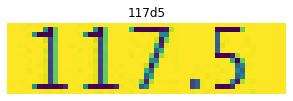

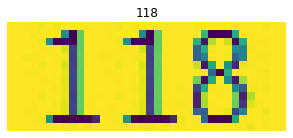

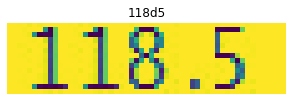

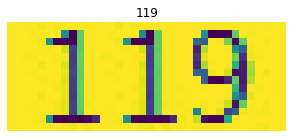

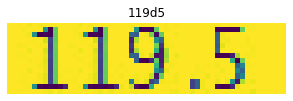

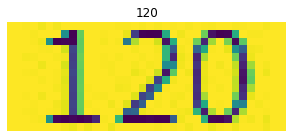

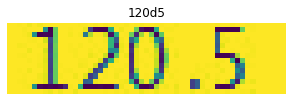

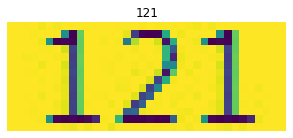

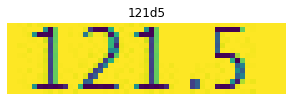

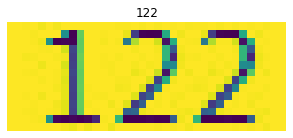

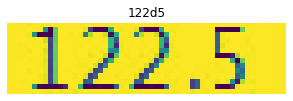

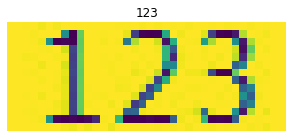

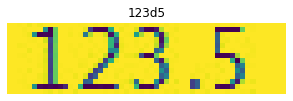

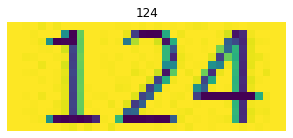

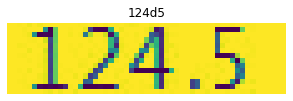

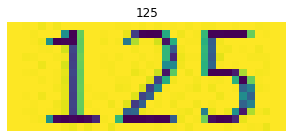

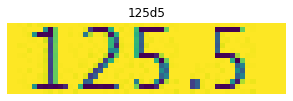

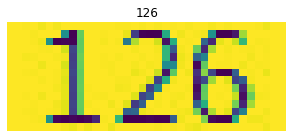

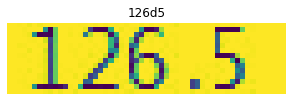

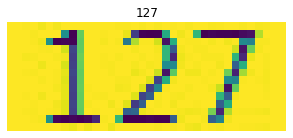

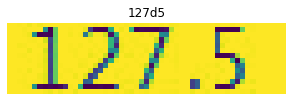

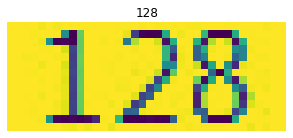

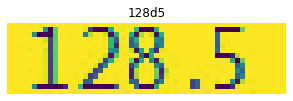

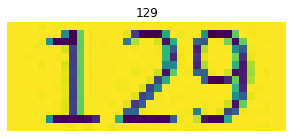

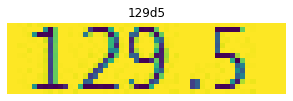

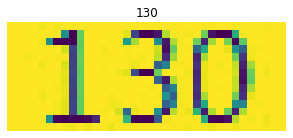

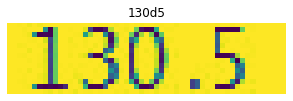

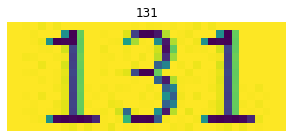

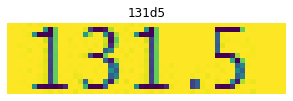

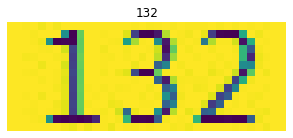

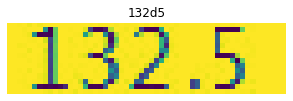

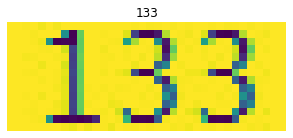

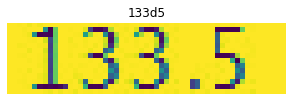

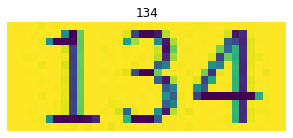

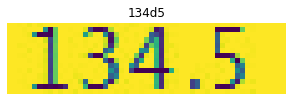

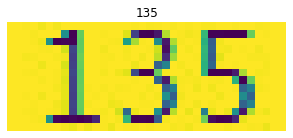

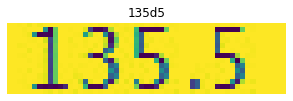

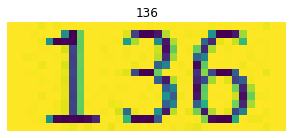

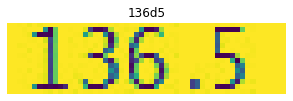

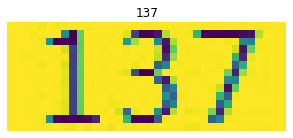

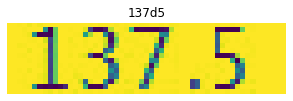

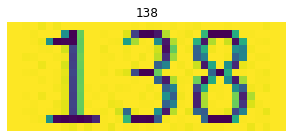

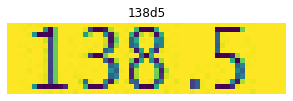

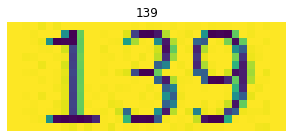

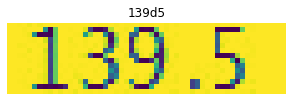

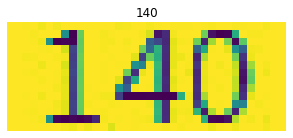

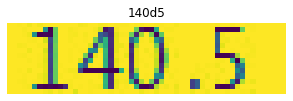

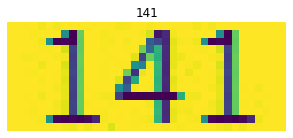

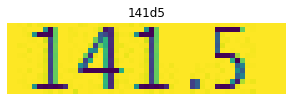

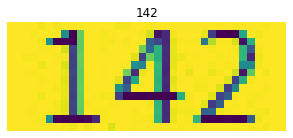

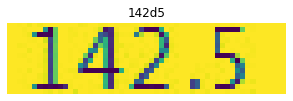

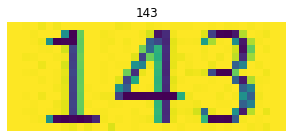

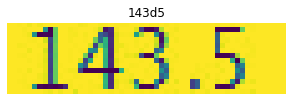

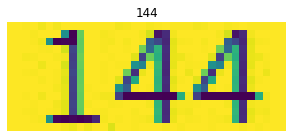

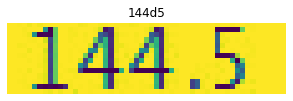

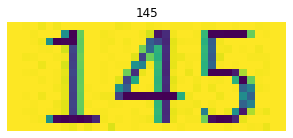

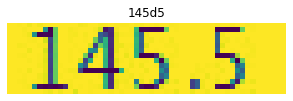

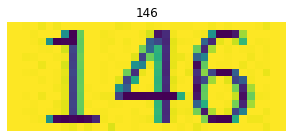

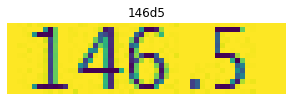

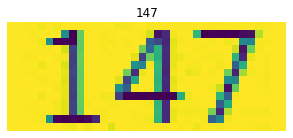

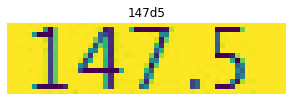

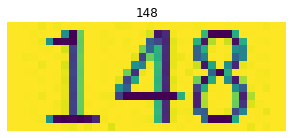

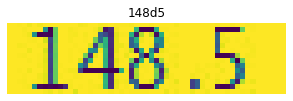

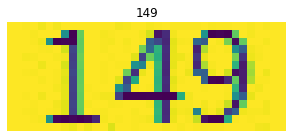

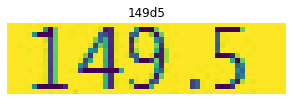

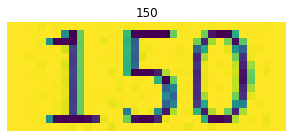

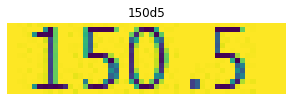

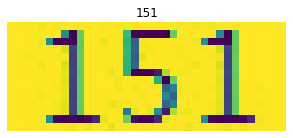

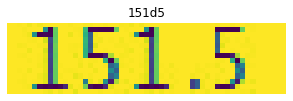

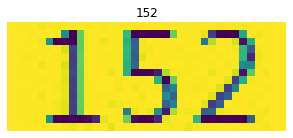

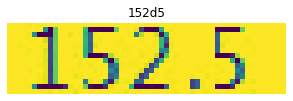

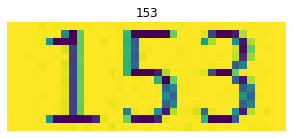

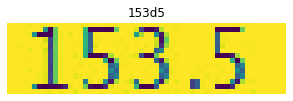

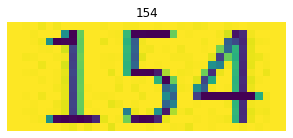

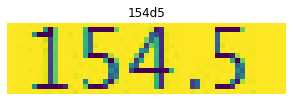

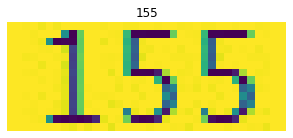

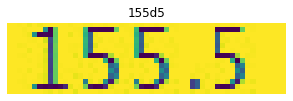

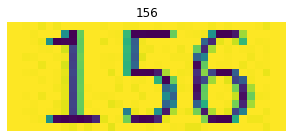

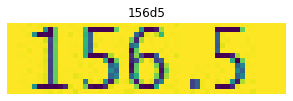

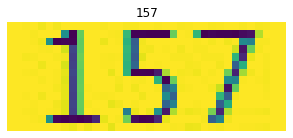

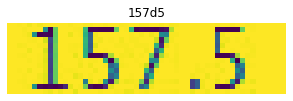

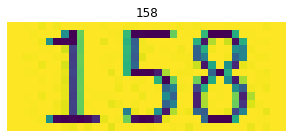

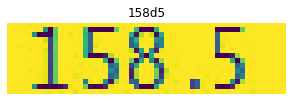

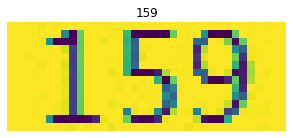

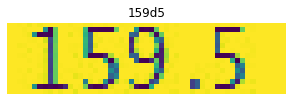

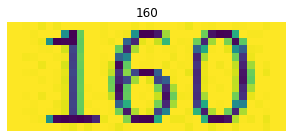

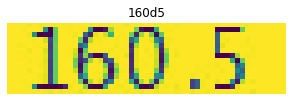

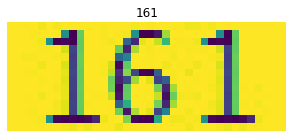

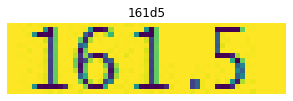

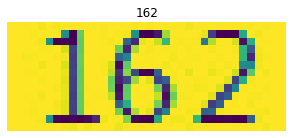

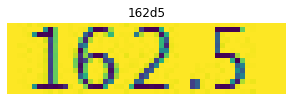

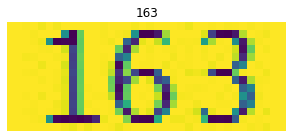

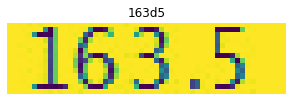

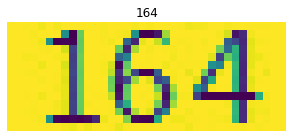

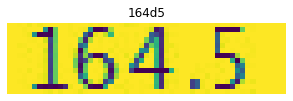

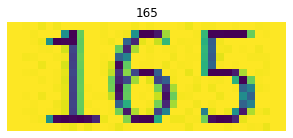

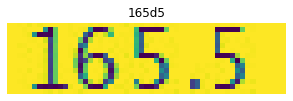

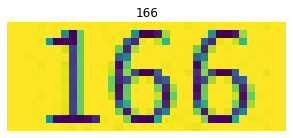

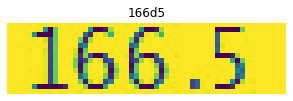

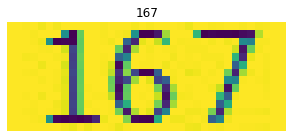

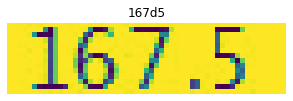

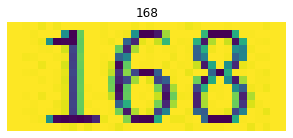

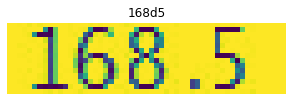

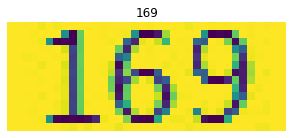

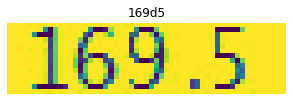

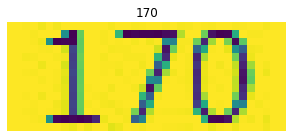

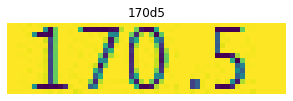

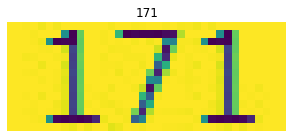

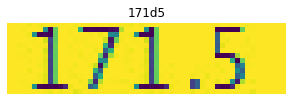

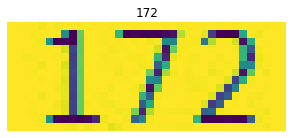

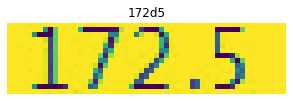

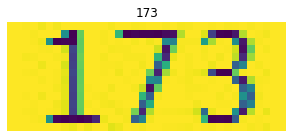

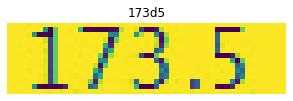

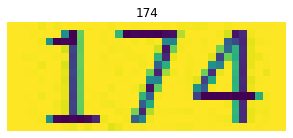

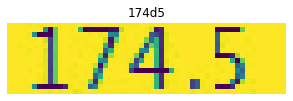

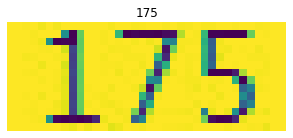

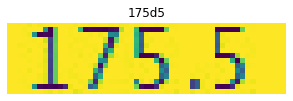

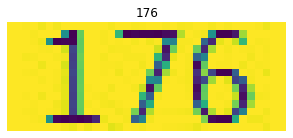

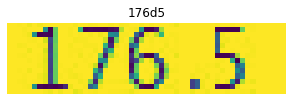

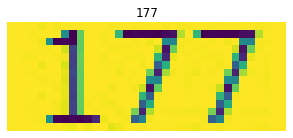

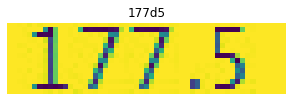

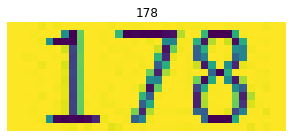

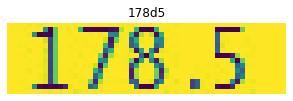

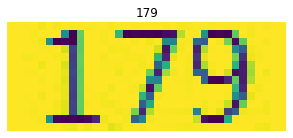

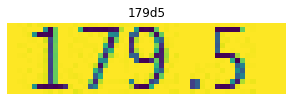

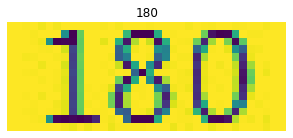

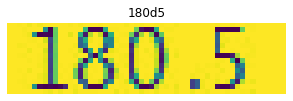

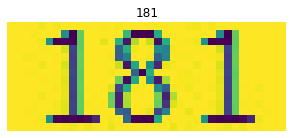

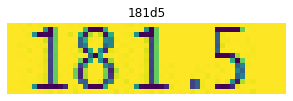

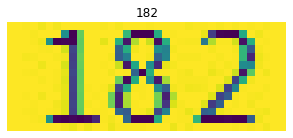

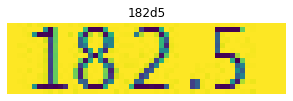

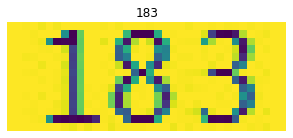

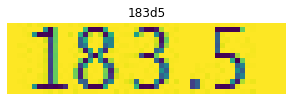

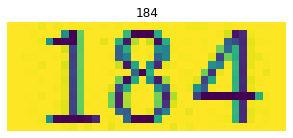

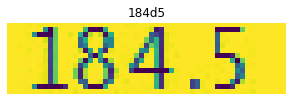

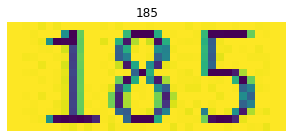

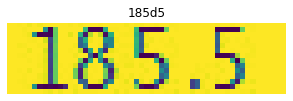

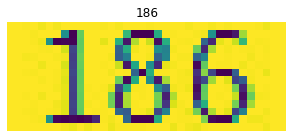

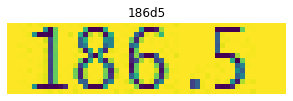

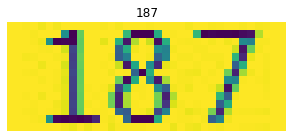

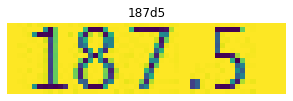

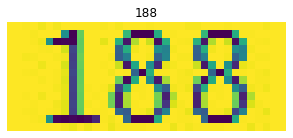

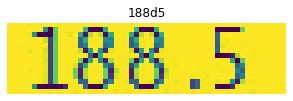

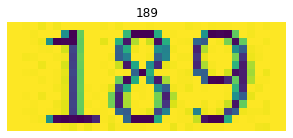

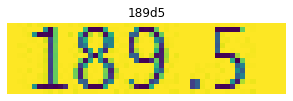

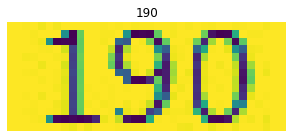

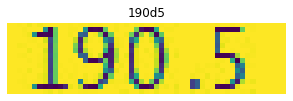

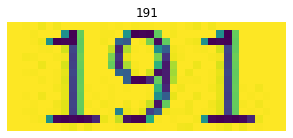

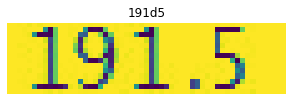

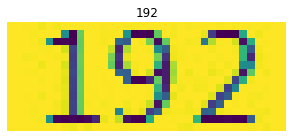

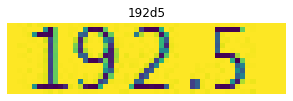

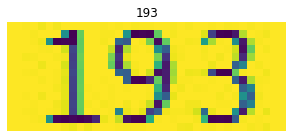

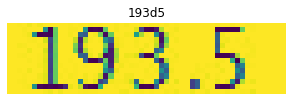

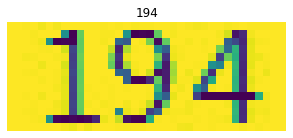

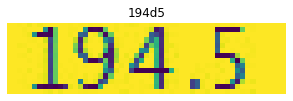

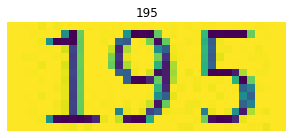

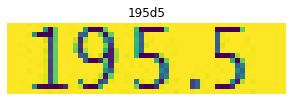

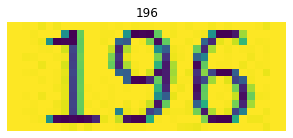

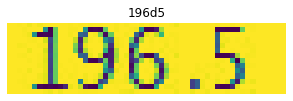

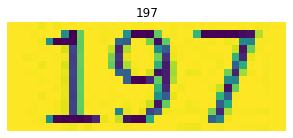

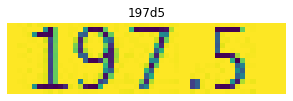

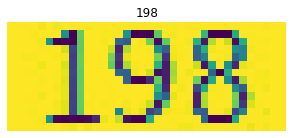

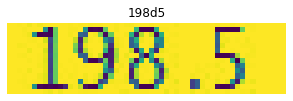

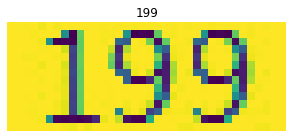

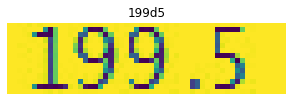

In [373]:
for num in font_triple_list[0]:
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    plt.title(f'{num.label}')
    axes.imshow(num.img)
    axes.axis('off')

In [374]:
save_list

['./data/font/gothic/char',
 './data/font/gulim/char',
 './data/font/gungsuh/char']

# 이미지 팽창

In [40]:
def blur_img(img, scale):
    return cv2.blur(img, (scale,scale))

def noise_img(img, scale):
    return img * scale

def cloudy_img(img, start, end):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            img[y][x] = min(255, img[y][x] + random.randint(start,end))
    return img

In [41]:
print(f'len(font_one_list) : {len(font_one_list)} len(font_one_list[0]) : {len(font_one_list[0])}')
print(f'len(font_doube_list) : {len(font_doube_list)} len(font_doube_list[0]) : {len(font_doube_list[0])}')
print(f'len(font_triple_list) : {len(font_triple_list)} len(font_triple_list[0]) : {len(font_triple_list[0])}')

len(font_one_list) : 3 len(font_one_list[0]) : 11


NameError: name 'font_doube_list' is not defined

In [87]:
class num_info:
    def __init__(self,img, label):
        self.img = img
        self.label = label
        
FONT_NAME = ['gothic', 'gulim', 'gungsuh']

## 블러, 여러 필터

In [3]:
def make_image(font_img_list, save_list):
    total_img_list = []
    for idx, imgs_list in enumerate(font_img_list):
        save_path = save_list[idx]
        blur_img_list = []
        for img in imgs_list:
            for b in range(1,4):
                img_ = img.img
                label = f'b{b}_{img.label}'
                blur_image = num_info(blur_img(img_, b), label)
                blur_img_list.append(blur_image)
        noise_img_list = []
        for img in blur_img_list:
            for n in range(1,4):
                img_ = img.img
                label = f'n{n}{img.label}'
                noise_images = num_info(noise_img(img_, n), label)
                noise_img_list.append(noise_images)
        reverse_img_list = []
        for img in noise_img_list:
            for _ in range(2):
                img_ = img.img
                label = f'{FONT_NAME[idx]}_r{_}{img.label}'
                if _ % 2 == 0:
                    reverse_images = num_info(reverse_img(img_), label)
                    reverse_img_list.append(reverse_images)
                else:
                    reverse_images = num_info(img_, label)
                    reverse_img_list.append(reverse_images)
        total_img_list.append(reverse_img_list)
    return total_img_list

In [495]:
tt = make_image(font_one_list, save_list)

C:\ProgramData\Anaconda3\envs\tmh_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


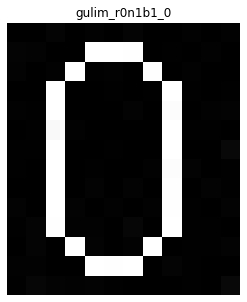

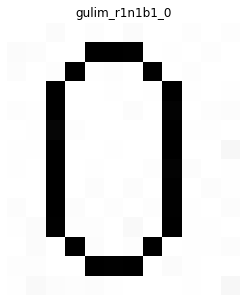

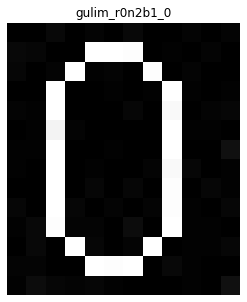

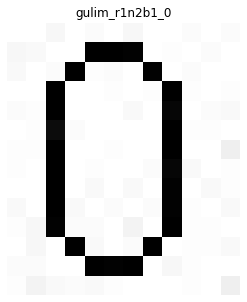

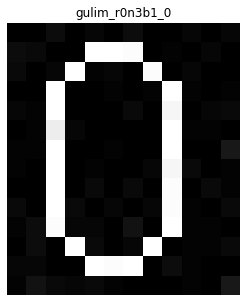

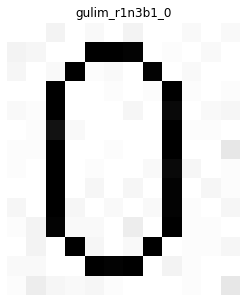

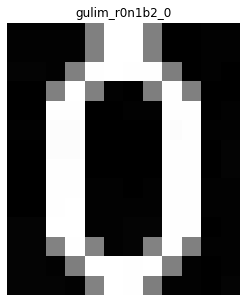

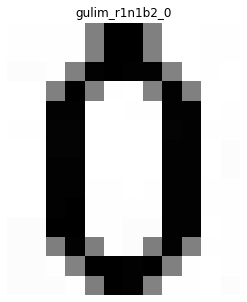

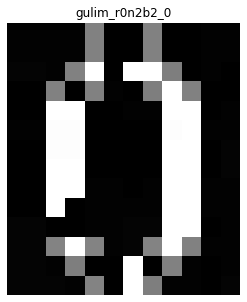

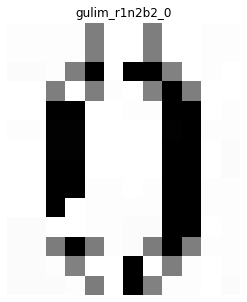

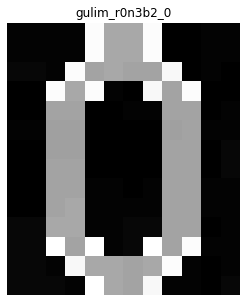

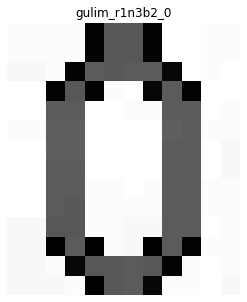

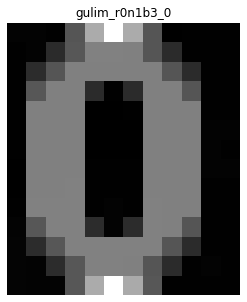

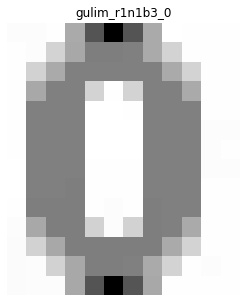

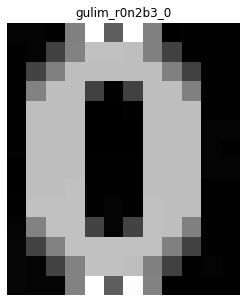

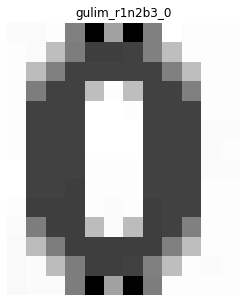

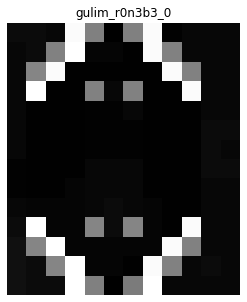

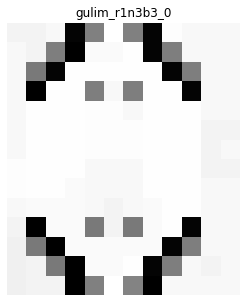

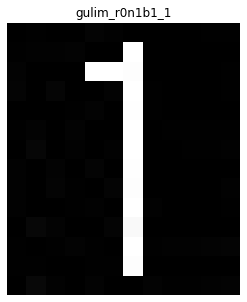

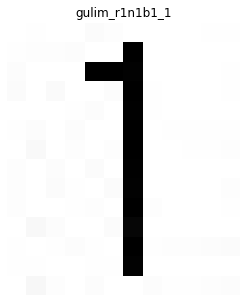

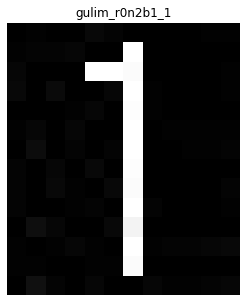

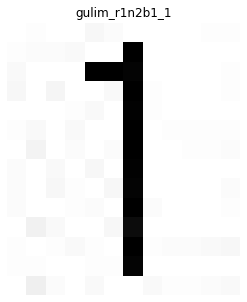

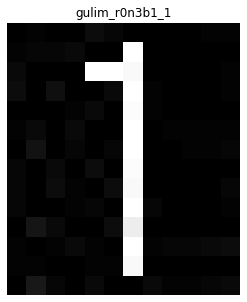

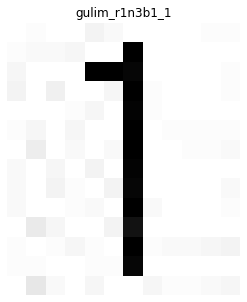

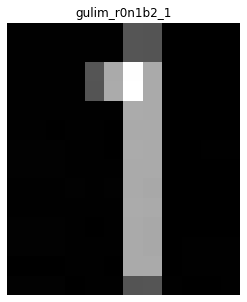

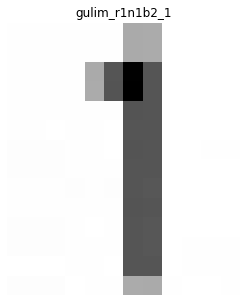

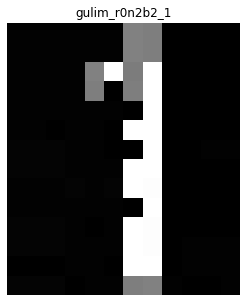

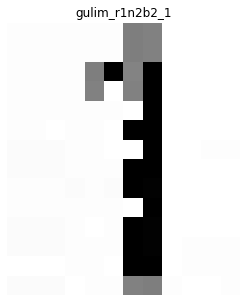

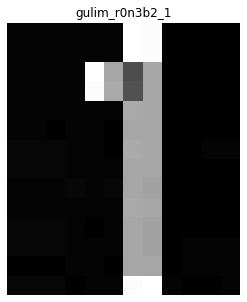

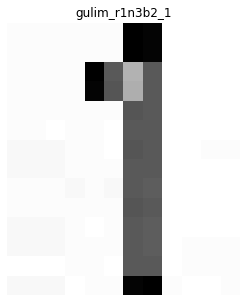

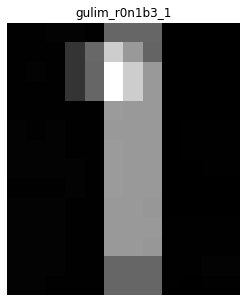

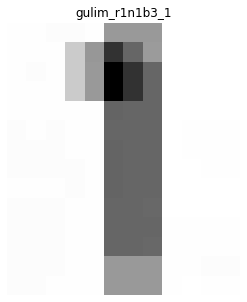

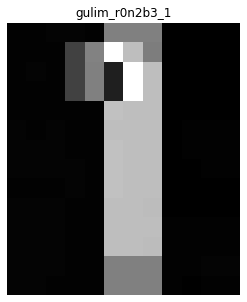

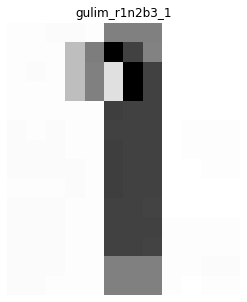

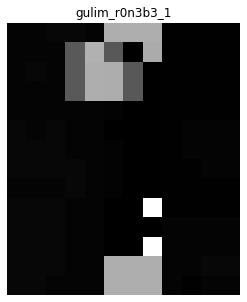

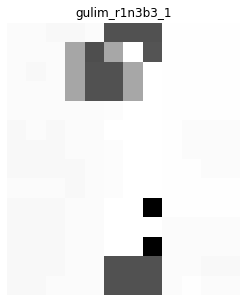

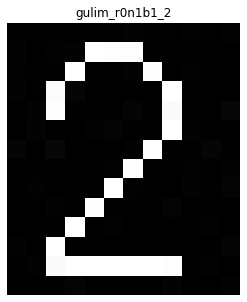

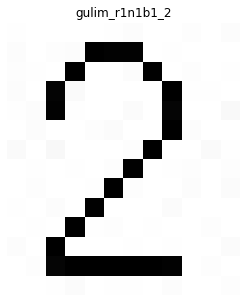

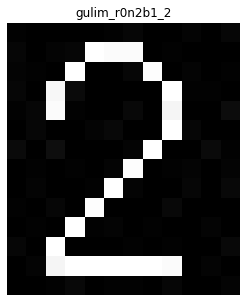

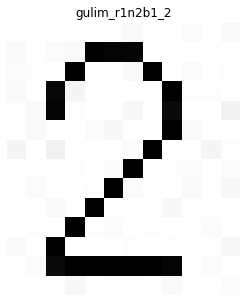

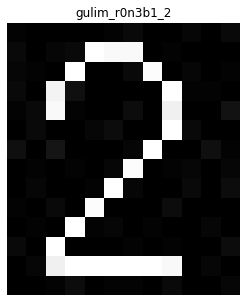

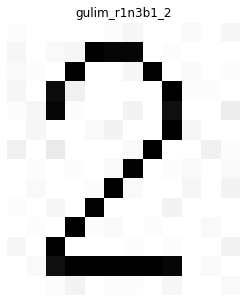

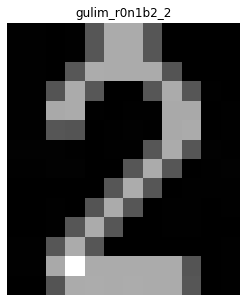

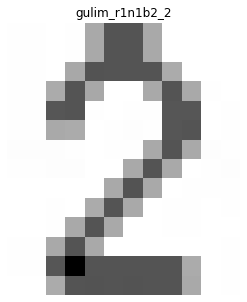

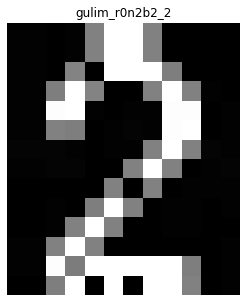

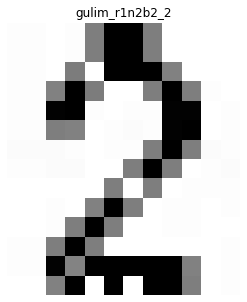

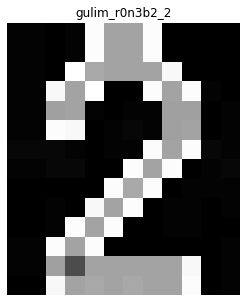

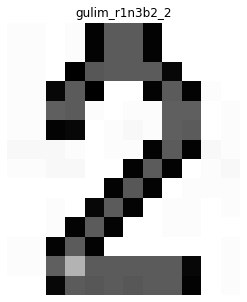

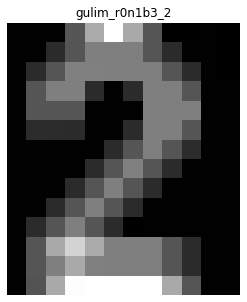

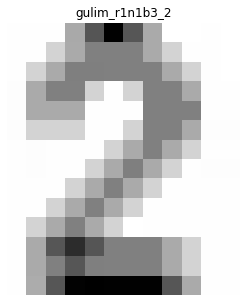

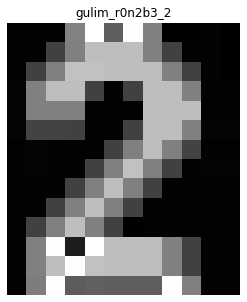

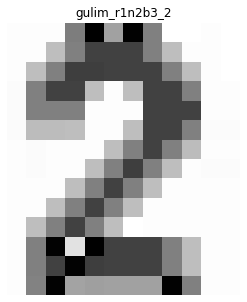

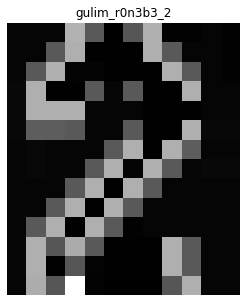

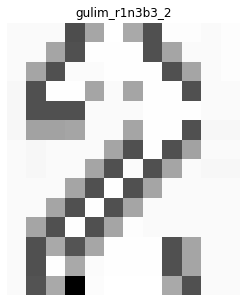

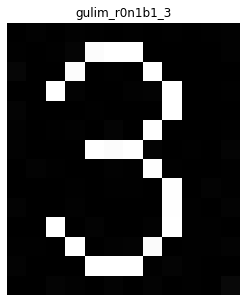

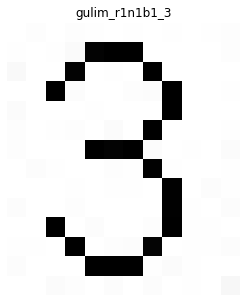

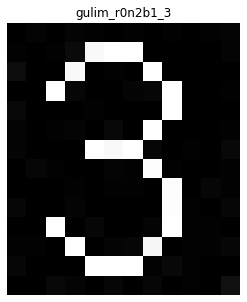

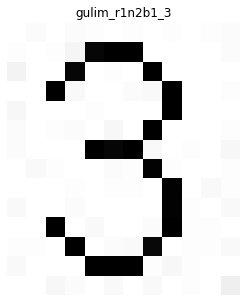

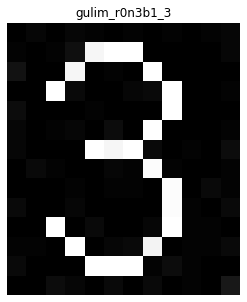

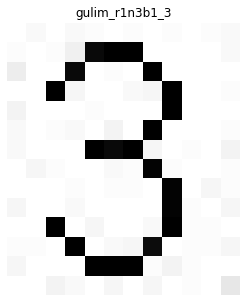

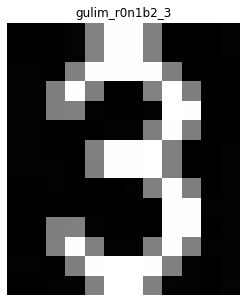

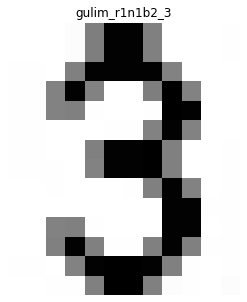

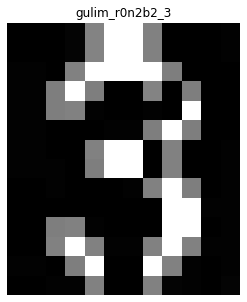

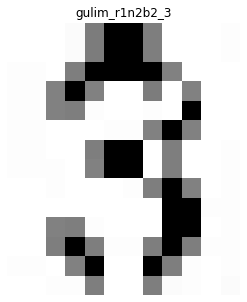

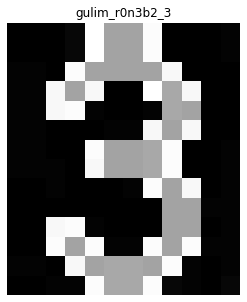

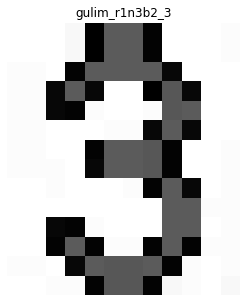

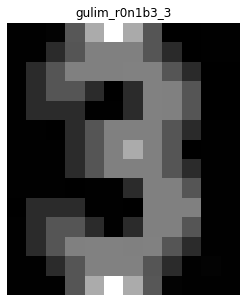

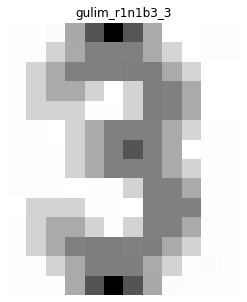

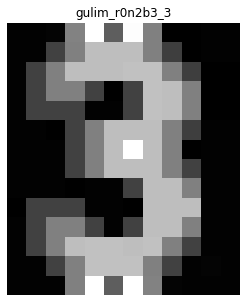

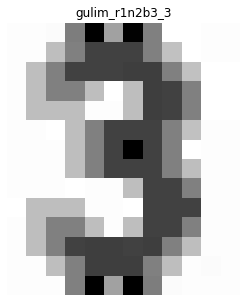

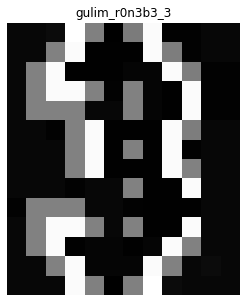

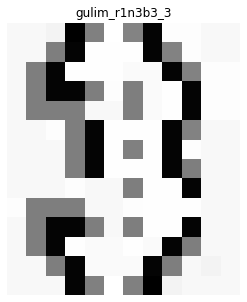

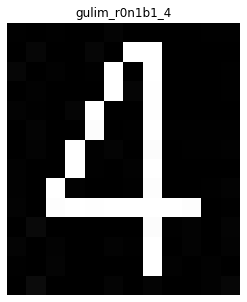

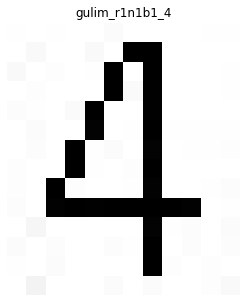

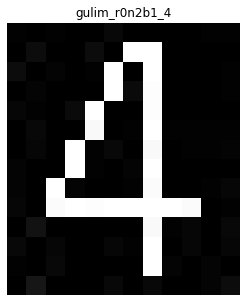

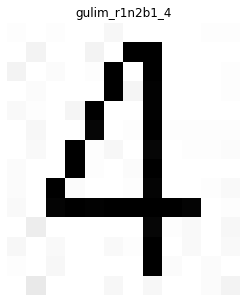

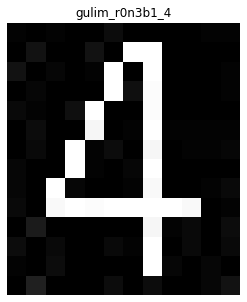

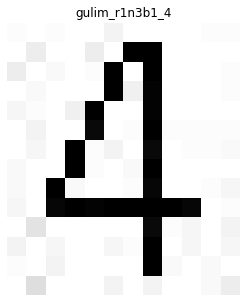

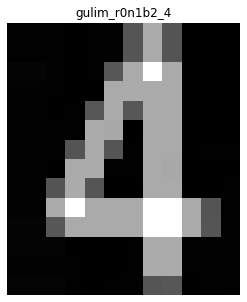

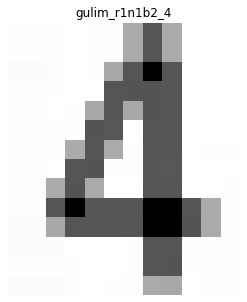

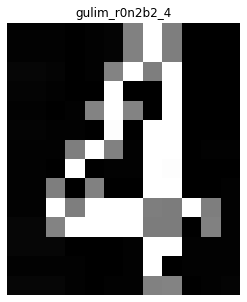

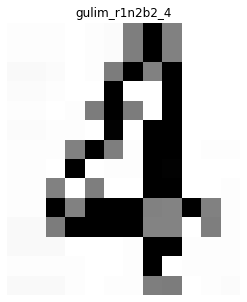

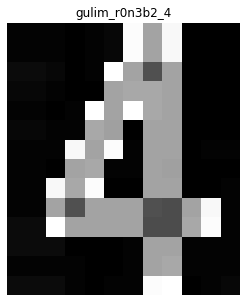

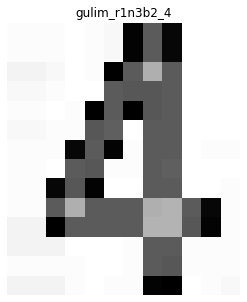

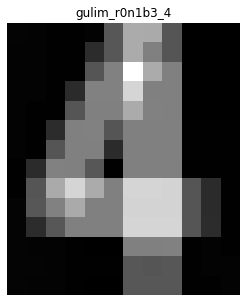

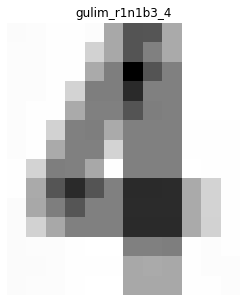

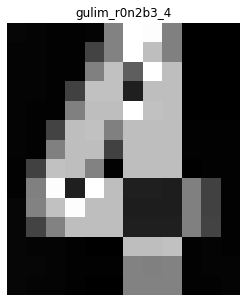

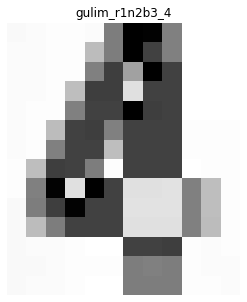

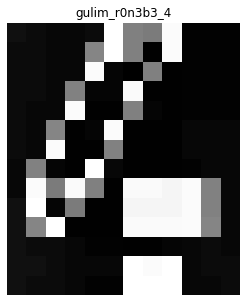

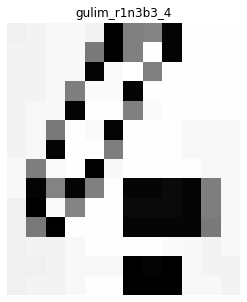

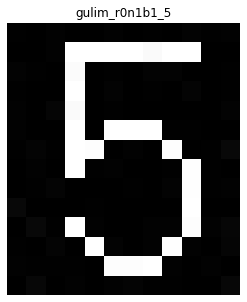

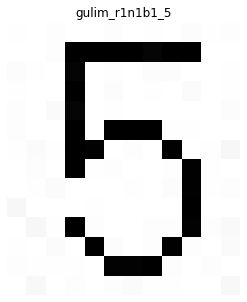

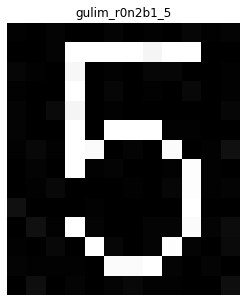

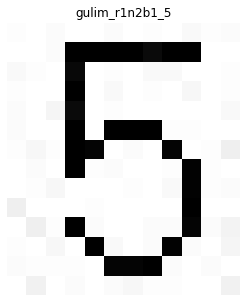

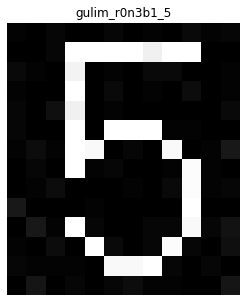

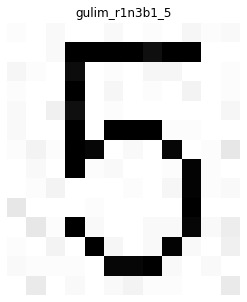

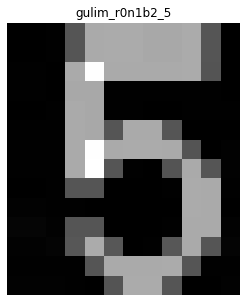

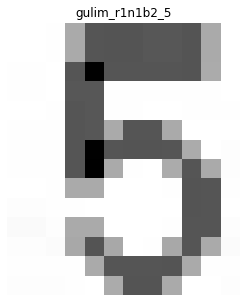

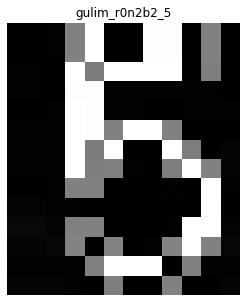

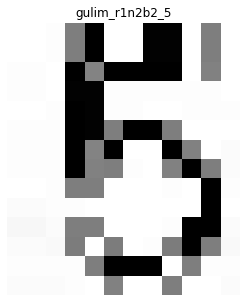

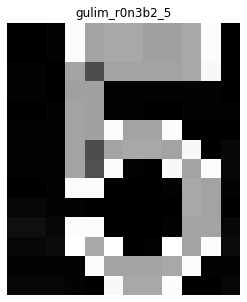

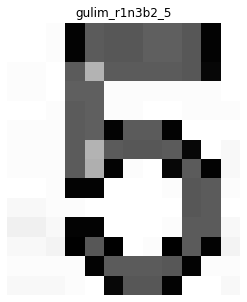

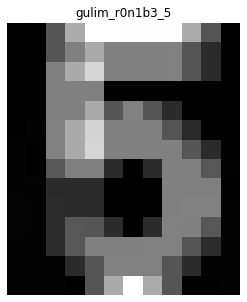

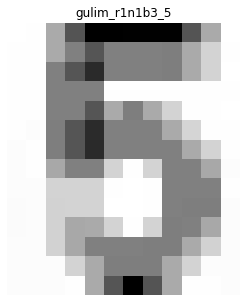

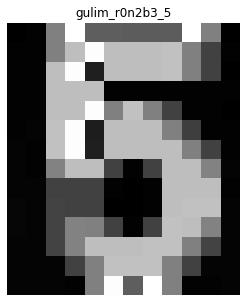

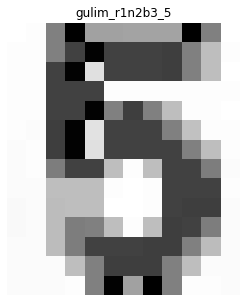

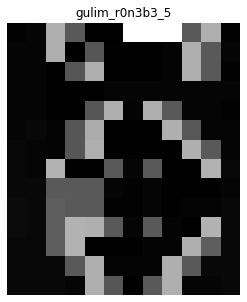

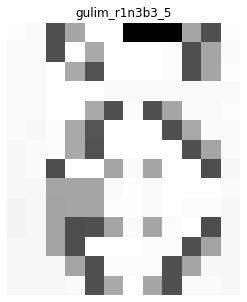

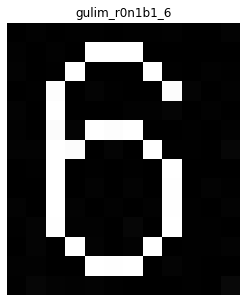

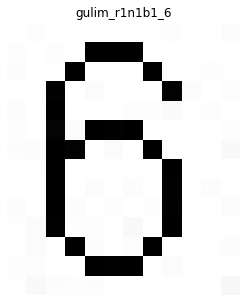

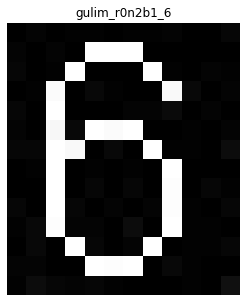

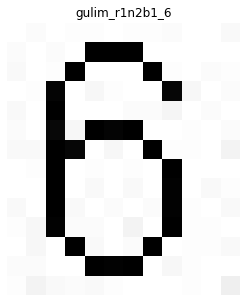

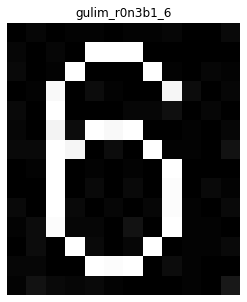

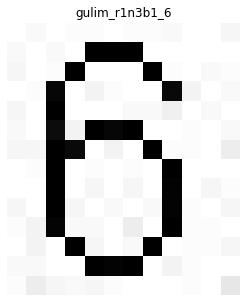

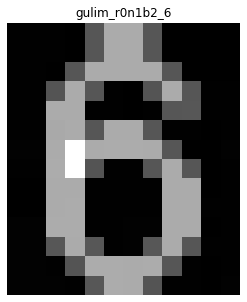

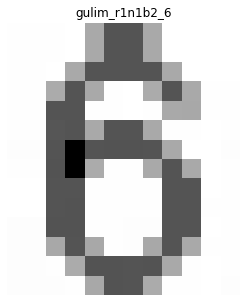

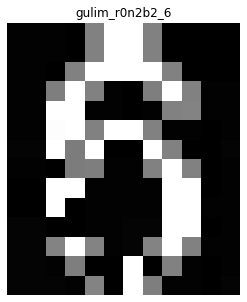

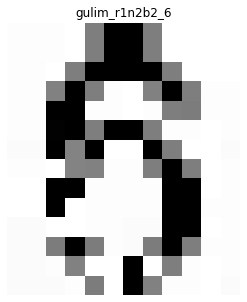

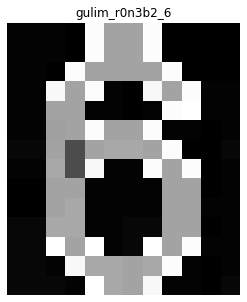

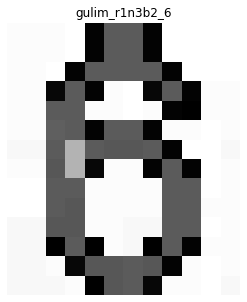

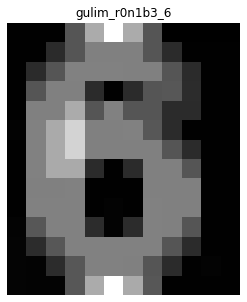

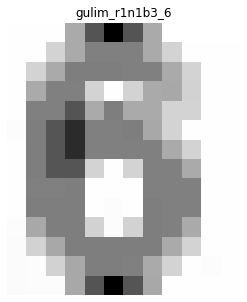

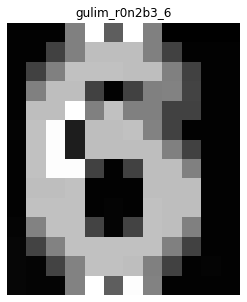

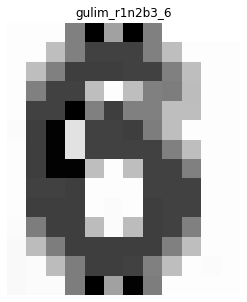

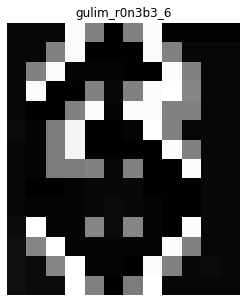

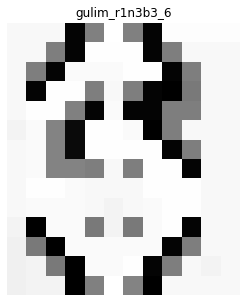

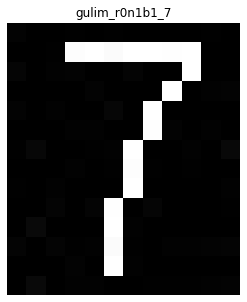

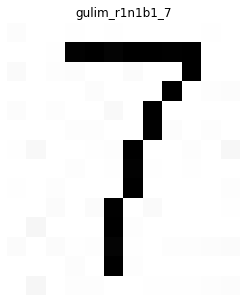

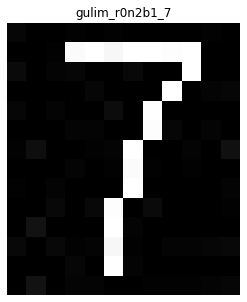

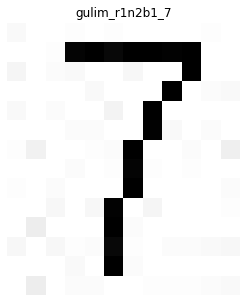

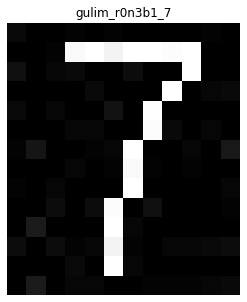

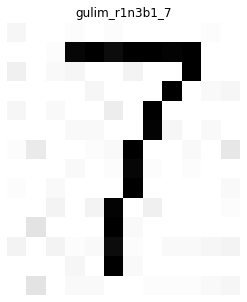

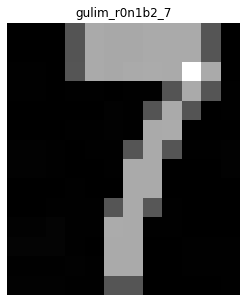

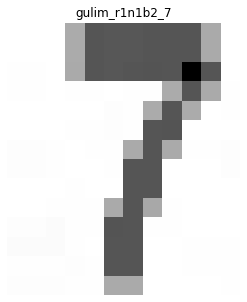

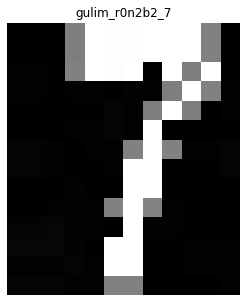

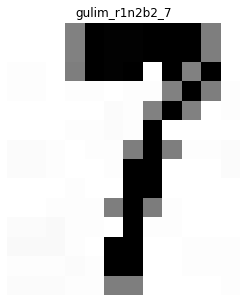

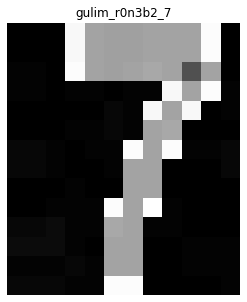

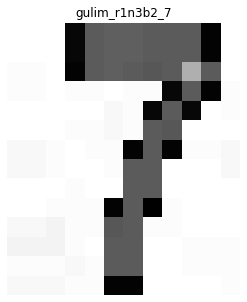

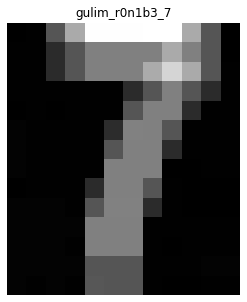

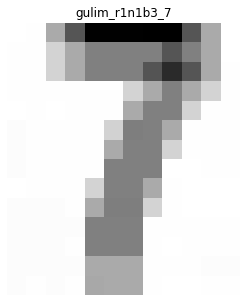

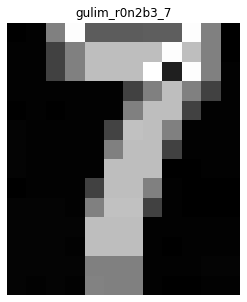

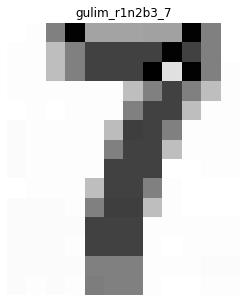

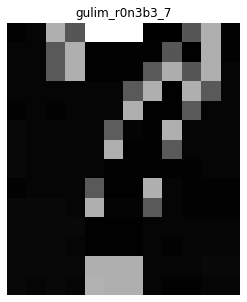

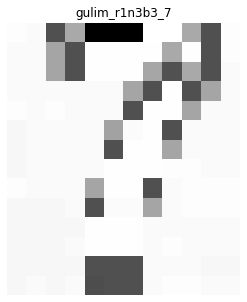

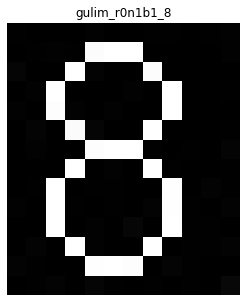

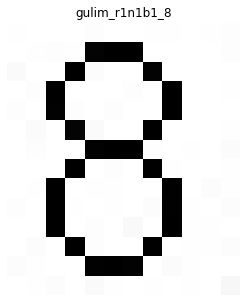

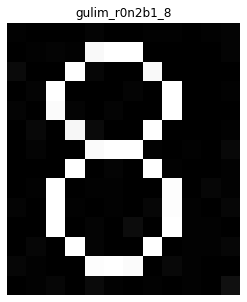

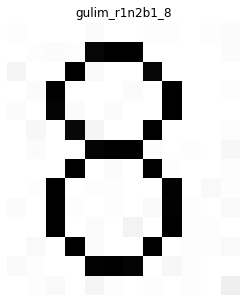

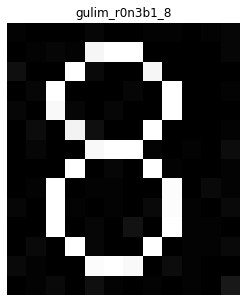

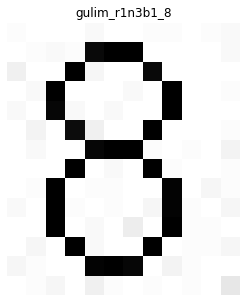

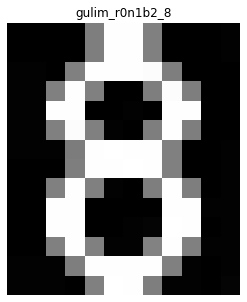

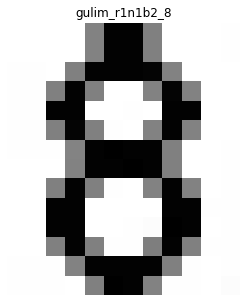

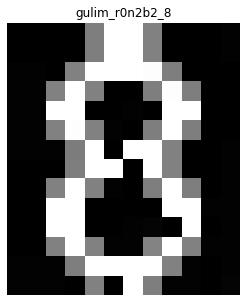

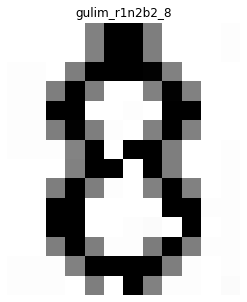

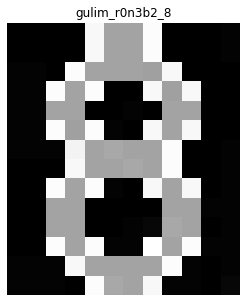

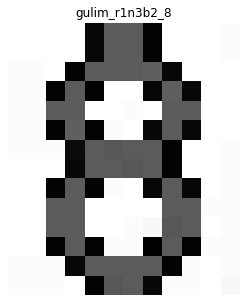

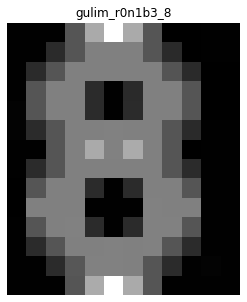

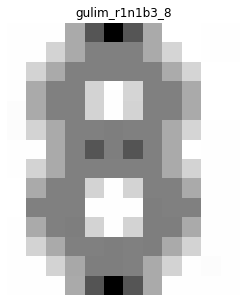

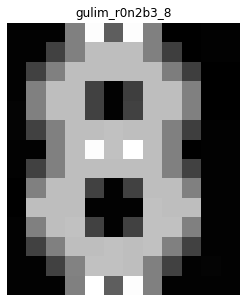

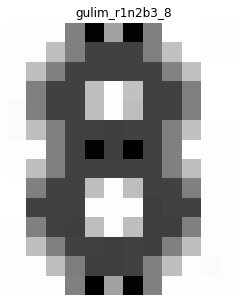

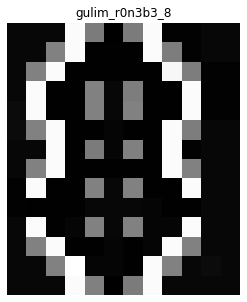

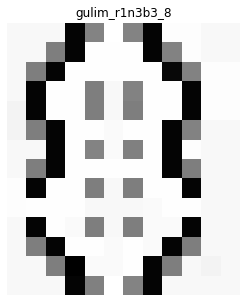

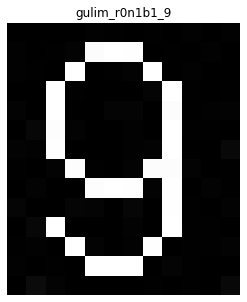

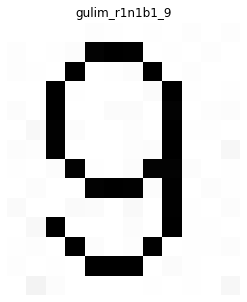

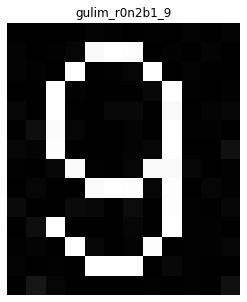

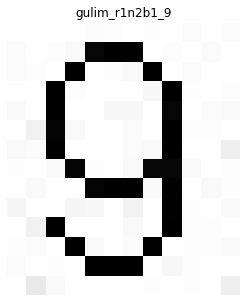

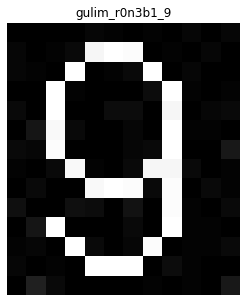

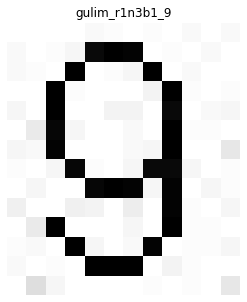

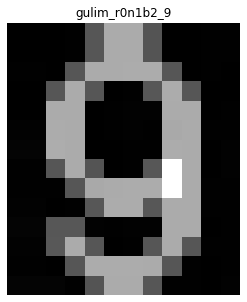

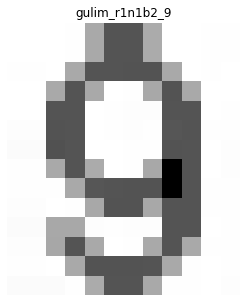

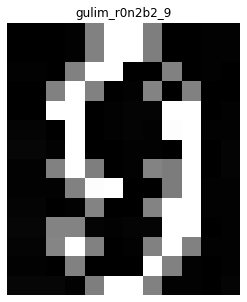

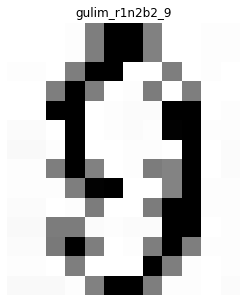

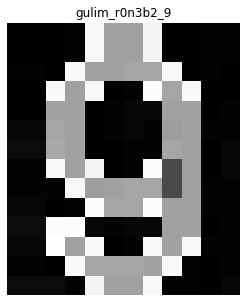

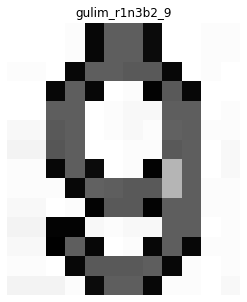

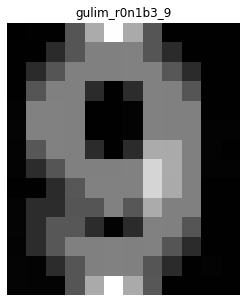

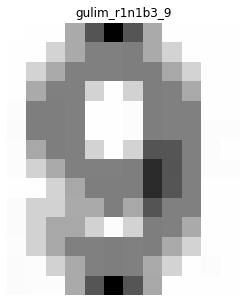

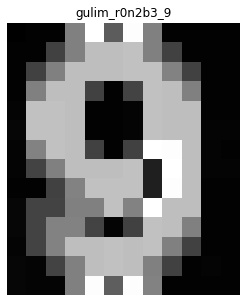

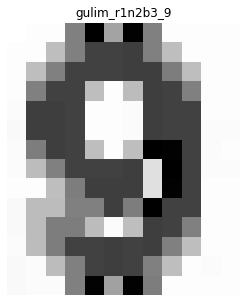

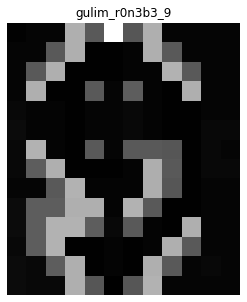

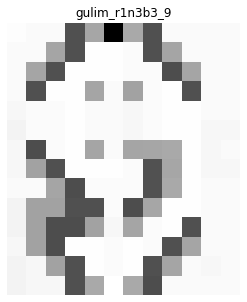

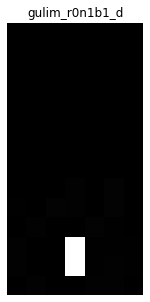

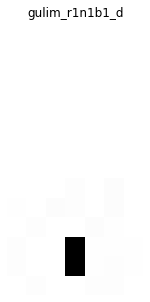

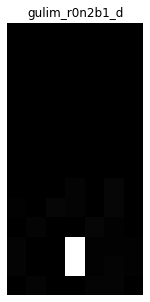

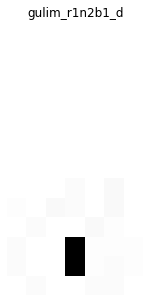

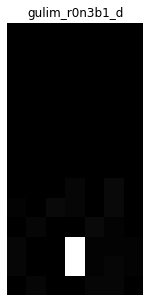

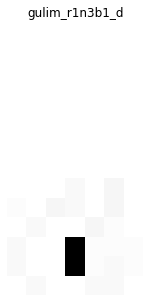

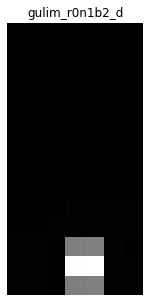

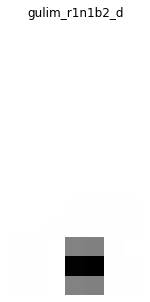

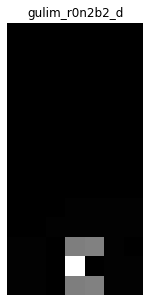

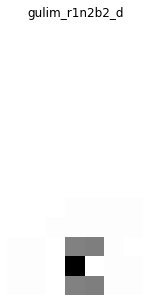

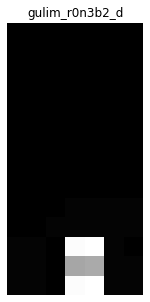

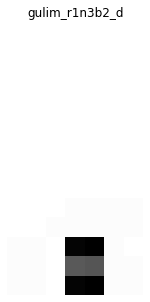

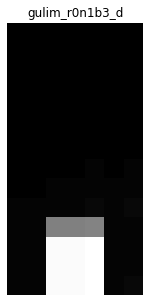

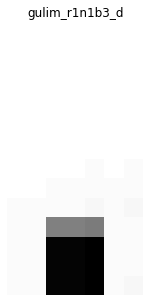

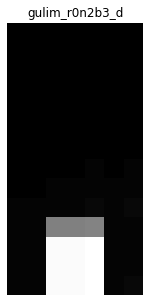

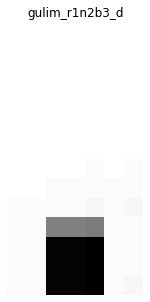

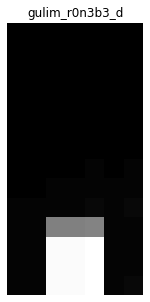

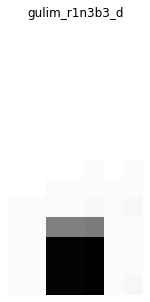

In [497]:
for img_ in tt[1]:
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    plt.title(f'{img_.label}')
    axes.imshow(img_.img, 'gray')
    axes.axis('off')

In [507]:
one_imgs = make_image(font_one_list, save_list)

In [508]:
double_imgs = make_image(font_doube_list, save_list)

In [509]:
triple_imgs = make_image(font_triple_list, save_list)

In [543]:
len(triple_imgs[0])

3600

In [546]:
save_list

['./data/font/gothic/char',
 './data/font/gulim/char',
 './data/font/gungsuh/char']

In [ ]:
def save_imgs(font_imgs, save_path):
    for imgs in font_imgs:
        for img_class in imgs:
            label = img_class.label
            # gothic
            if label.split('_')[0] == FONT_NAME[0]:
                cv2.imwrite(f'{save_path[0]}/{label}.jpg', img_class.img)
            # gulim
            elif label.split('_')[0]  == FONT_NAME[1]:
                cv2.imwrite(f'{save_path[1]}/{label}.jpg', img_class.img)
            # gungsuh
            else:
                cv2.imwrite(f'{save_path[2]}/{label}.jpg', img_class.img)

In [553]:
save_imgs(one_imgs, save_list)

In [554]:
save_imgs(double_imgs, save_list)

In [555]:
save_imgs(triple_imgs, save_list)

In [506]:
tt[0][0].label.split('_')[0]

'gothic'

# 다시..


In [44]:
def shift_img(img, x_shift, y_shift):
    gray_img = img
    for y in range(gray_img.shape[0]):
        for x in range(gray_img.shape[1]):
            # 검은색은 0인데 이걸 일단 1로 바꿔둠
            if gray_img[y][x] == 0:
                gray_img[y][x] = 1
    # 변환 행렬, x축으로 x_sshift
    M = np.float32([[1,0,x_shift],[0,1,y_shift]])
    shift_img = cv2.warpAffine(gray_img, M,(gray_img.shape[1], gray_img.shape[0]))
    for y in range(shift_img.shape[0]):
        for x in range(shift_img.shape[1]):
            if shift_img[y][x] == 0:
                shift_img[y][x] = 255
            if shift_img[y][x] == 1:
                shift_img[y][x] = 0
    return shift_img

In [45]:
def blur_img(img, scale):
    return cv2.blur(img, (scale,scale))

def noise_img(img, scale):
    return img * scale

def cloudy_img(img, start, end):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            img[y][x] = min(255, img[y][x] + random.randint(start,end))
    return img

In [46]:
class num_info:
    def __init__(self,img, label):
        self.img = img
        self.label = label
        
FONT_NAME = ['font1', 'font2', 'font3']

In [62]:
def make_image(font_img_list, save_list):
    total_img_list = []
    for idx, imgs_list in enumerate(font_img_list):
        save_path = save_list[idx]
        blur_img_list = []
        for img in imgs_list:
            for b in range(1,4):
                img_ = img.img
                label = f'b{b}_{img.label}'
                blur_image = num_info(blur_img(img_, b), label)
                blur_img_list.append(blur_image)
        noise_img_list = []
        for img in blur_img_list:
            for n in range(1,3):
                img_ = img.img
                label = f'n{n}{img.label}'
                noise_images = num_info(noise_img(img_, n), label)
                noise_img_list.append(noise_images)
        cloudy_img_list = []
        for img in noise_img_list:
            for c in range(1,3):
                st = c * 3
                end = st * 7
                img_ = img.img
                label = f'{FONT_NAME[idx]}_c{c}{img.label}'
                cloudy_images = num_info(cloudy_img(img_, st, end), label)
                cloudy_img_list.append(cloudy_images)
        total_img_list.append(cloudy_img_list)
    return total_img_list

In [48]:
def save_imgs(font_imgs, save_path):
    for idx, imgs in enumerate(font_imgs):
        print(f'{idx}...')
        for img_class in imgs:
            label = img_class.label
            # gothic
            if label.split('_')[0] == FONT_NAME[0]:
                cv2.imwrite(f'{save_path[0]}/{label}.jpg', img_class.img)
            # gulim
            elif label.split('_')[0]  == FONT_NAME[1]:
                cv2.imwrite(f'{save_path[1]}/{label}.jpg', img_class.img)
            # gungsuh
            else:
                cv2.imwrite(f'{save_path[2]}/{label}.jpg', img_class.img)

In [49]:
data_path = './data/font'
data_folder = os.listdir(data_path)
data_folder_list = []
for data in data_folder:
    font_path = f'{data_path}/{data}'
    data_folder_list.append(font_path)
    print(os.listdir(font_path))
    
fonts_list = []
save_list = []
for font_ in data_folder_list:
    font_list = []
    for img_name in os.listdir(font_):
        if '.jpg' in img_name:
            font_list.append(f'{font_}/{img_name}')
        else:
            save_list.append(f'{font_}/{img_name}')
    fonts_list.append(font_list)

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']
['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']
['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']


In [61]:
fonts_list[0]

['./data/font/font1/0.jpg',
 './data/font/font1/1.jpg',
 './data/font/font1/2.jpg',
 './data/font/font1/3.jpg',
 './data/font/font1/4.jpg',
 './data/font/font1/5.jpg',
 './data/font/font1/6.jpg',
 './data/font/font1/7.jpg',
 './data/font/font1/8.jpg',
 './data/font/font1/9.jpg',
 './data/font/font1/d.jpg']

In [11]:
%%time
font_triple_list = []
for font in fonts_list:
    first_num = font[1:-1]
    second_num = font[0:-1]
    third_num = font[0:-1]
    # 0.5 이미지를 만들어 둠
    dot_img1 = cv2.imread(font[-1], cv2.IMREAD_GRAYSCALE)
    dot_img2 = cv2.imread(font[5], cv2.IMREAD_GRAYSCALE)
    dot_img = np.concatenate((dot_img1, shift_img(dot_img2, -4, 0)), axis = 1)
    
    triple_list = []
    for first in first_num:
        first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
        first_label = first[-5]
        for second in second_num:
            second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)
            seoncd_label = first_label + second[-5]
            double_img = np.concatenate((shift_img(first_img, 2, 0), second_img), axis = 1)
            for third in third_num:
                third_img = cv2.imread(third, cv2.IMREAD_GRAYSCALE)
                triple_label = seoncd_label + third[-5]
                triple_img = np.concatenate((double_img, shift_img(third_img, -2, 0)), axis = 1)

                img = np.concatenate((triple_img, shift_img(dot_img, -2, 0)), axis = 1)
                label = triple_label + 'd5'
                triple_list.append(num_info(img, label))   
    font_triple_list.append(triple_list)

Wall time: 11.1 s


In [50]:
import random

In [103]:
%%time
font_triple_list = []
for font in fonts_list:
    first_num = font[1:-1]
    second_num = font[0:-1]
    third_num = font[0:-1]
    quad_num = font[0:-1]
    # 0.5 이미지를 만들어 둠
    dot_img = cv2.imread(font[-1], cv2.IMREAD_GRAYSCALE)
    
    triple_list = []
    for first in first_num:
        first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
        for second in second_num:
            second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)

            for third in third_num:
                third_img = cv2.imread(third, cv2.IMREAD_GRAYSCALE)
                btn = random.randint(0,2)
                if btn == 0:
                    random_x_shift = random.randint(-1,1)
                    first_label = first[-5]
                    seoncd_label = first_label + 'd' + second[-5]
                    double_img = np.concatenate((shift_img(first_img, random_x_shift, 0), dot_img), axis = 1)
                    double_img = np.concatenate((shift_img(double_img, random_x_shift, 0), second_img), axis = 1)
                    triple_label = seoncd_label + third[-5]
                    img = np.concatenate((double_img, shift_img(third_img, random_x_shift, 0)), axis = 1)
                    
                elif btn == 1:
                    random_x_shift = random.randint(-1,1)
                    first_label = first[-5]
                    seoncd_label = first_label + second[-5]
                    double_img = np.concatenate((shift_img(first_img, random_x_shift, 0), second_img), axis = 1)
                    triple_label = seoncd_label + 'd' + third[-5]
                    triple_img = np.concatenate((double_img, shift_img(dot_img, random_x_shift, 0)), axis = 1)
                    img = np.concatenate((triple_img, shift_img(third_img, random_x_shift, 0)), axis = 1)
                    
                else:
                    random_x_shift = random.randint(-1,1)
                    first_label = first[-5]
                    seoncd_label = first_label + second[-5]
                    double_img = np.concatenate((shift_img(first_img, random_x_shift, 0), second_img), axis = 1)
                    triple_label = seoncd_label + third[-5] + 'd'
                    triple_img = np.concatenate((double_img, shift_img(third_img, random_x_shift, 0)), axis = 1)
                    img = np.concatenate((triple_img, shift_img(dot_img, random_x_shift, 0)), axis = 1)
                    
                triple_list.append(num_info(img, triple_label))   
    font_triple_list.append(triple_list)

Wall time: 12.7 s


In [104]:
len(font_triple_list[0])

900

In [53]:
%%time
font_triple_list = []
for font in fonts_list:
    first_num = font[1:-1]
    second_num = font[0:-1]
    third_num = font[0:-1]
    # 0.5 이미지를 만들어 둠
    dot_img = cv2.imread(font[-1], cv2.IMREAD_GRAYSCALE)
    dot_img = np.concatenate((dot_img1, shift_img(dot_img2, -4, 0)), axis = 1)
    
    triple_list = []
    for first in first_num:
        first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
        for second in second_num:
            second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)
            seoncd_label = first_label + second[-5]
#             double_img = np.concatenate((shift_img(first_img, 2, 0), second_img), axis = 1)
            for third in third_num:
                third_img = cv2.imread(third, cv2.IMREAD_GRAYSCALE)
                
#                 triple_img = np.concatenate((double_img, shift_img(third_img, -2, 0)), axis = 1)
                btn = random.randint(0,2)
                if btn == 0:
                    random_x_shift = random.randint(-2,2)
                    first_label = first[-5]
                    seoncd_label = first_label + 'd' + second[-5]
                    double_img = np.concatenate((shift_img(first_img, random_x_shift, 0), dot_img), axis = 1)
                    double_img = np.concatenate((shift_img(double_img, random_x_shift, 0), second_img), axis = 1)
                    triple_label = seoncd_label + third[-5]
                    triple_img = np.concatenate((double_img, shift_img(third_img, -2, 0)), axis = 1)
                elif btn == 1:
                    
                else:
                    
                img = np.concatenate((triple_img, shift_img(dot_img, -2, 0)), axis = 1)
                label = triple_label + 'd5'
                triple_list.append(num_info(img, label))   
    font_triple_list.append(triple_list)

IndentationError: expected an indented block (<unknown>, line 32)

In [105]:
len(font_triple_list)

3

In [106]:
len(font_triple_list[0])

900

C:\Users\ultra\Anaconda3\envs\ocr_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


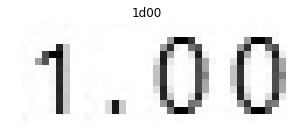

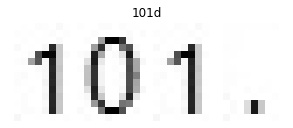

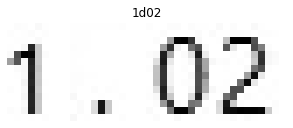

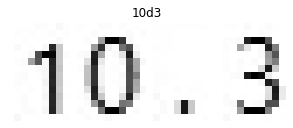

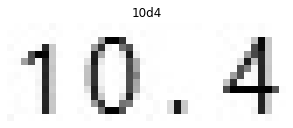

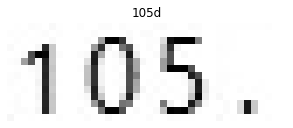

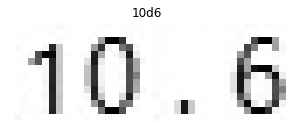

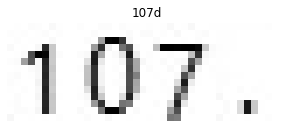

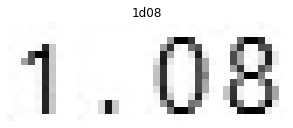

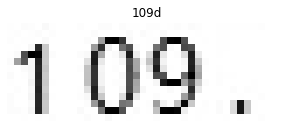

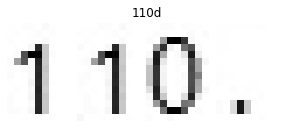

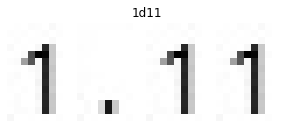

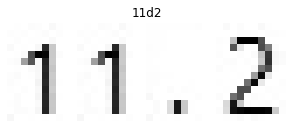

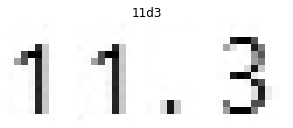

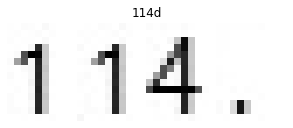

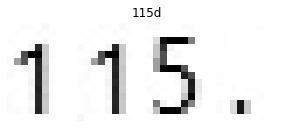

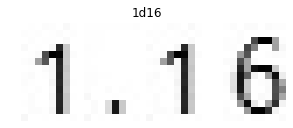

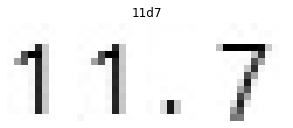

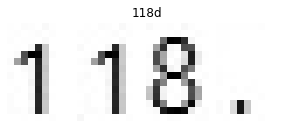

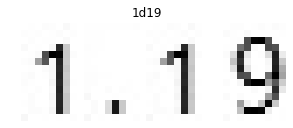

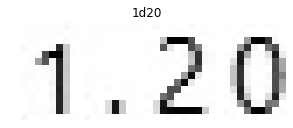

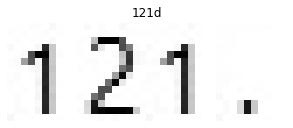

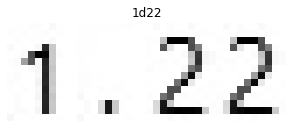

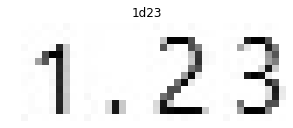

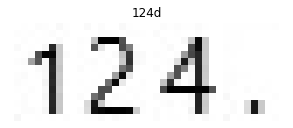

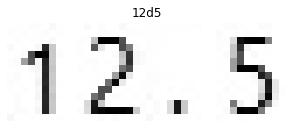

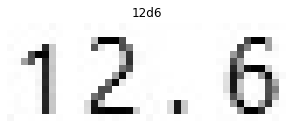

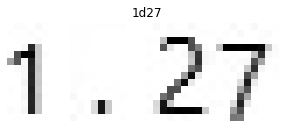

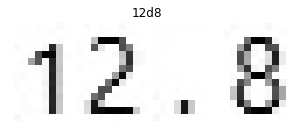

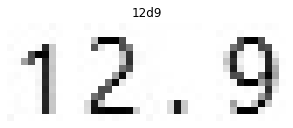

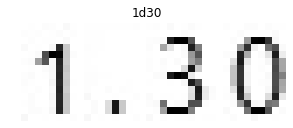

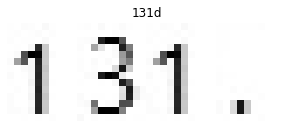

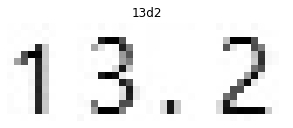

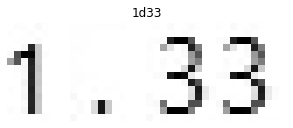

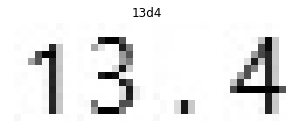

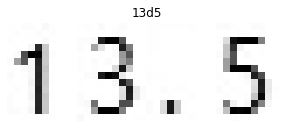

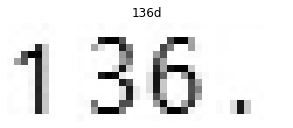

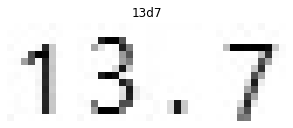

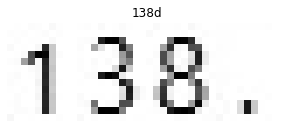

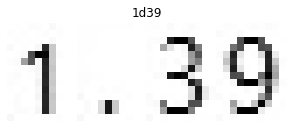

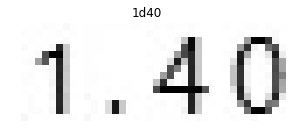

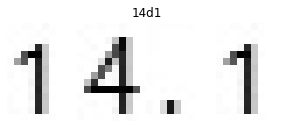

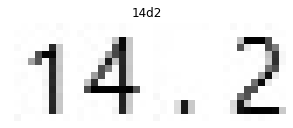

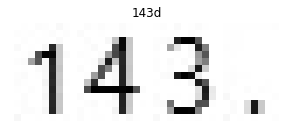

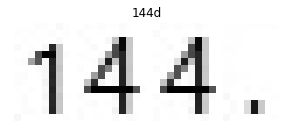

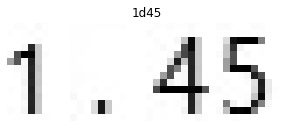

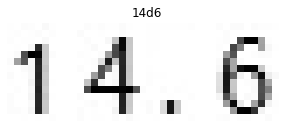

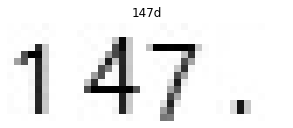

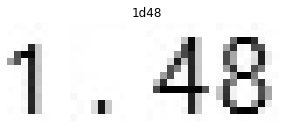

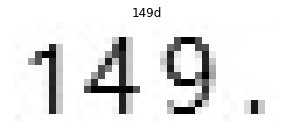

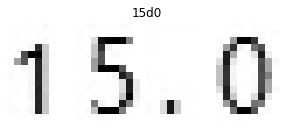

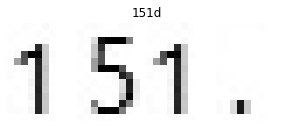

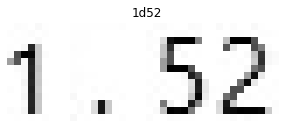

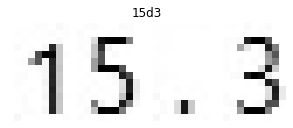

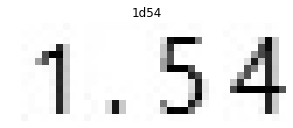

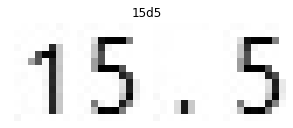

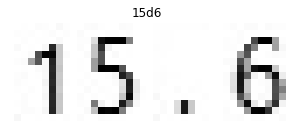

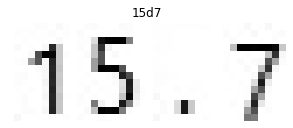

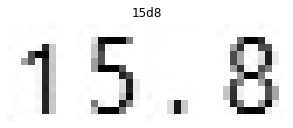

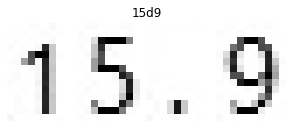

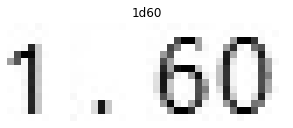

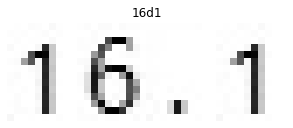

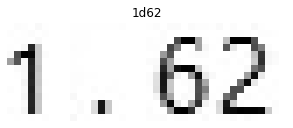

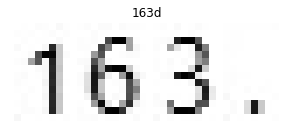

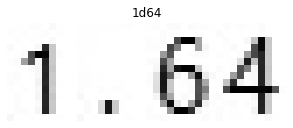

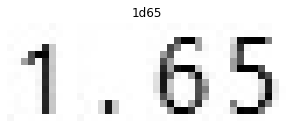

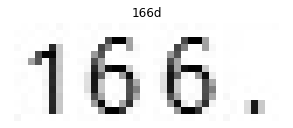

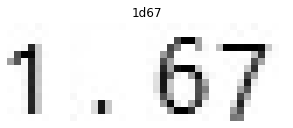

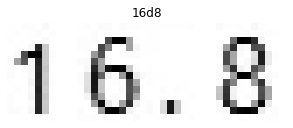

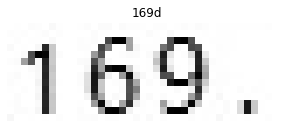

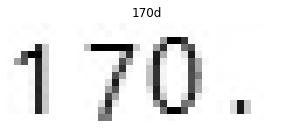

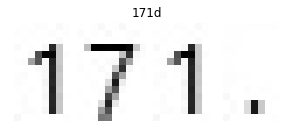

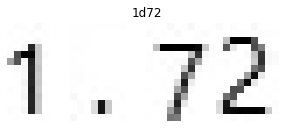

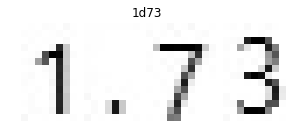

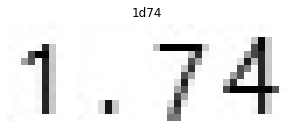

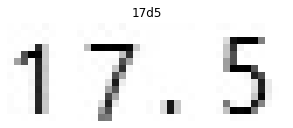

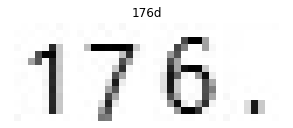

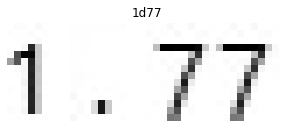

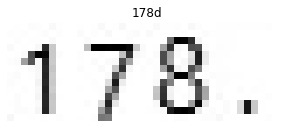

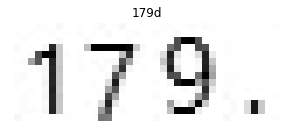

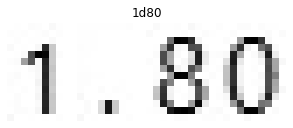

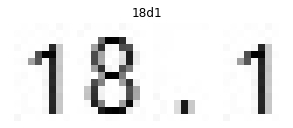

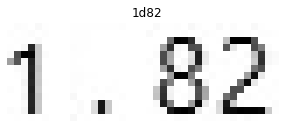

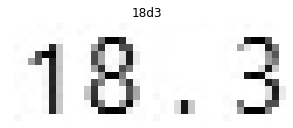

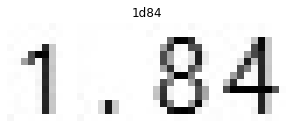

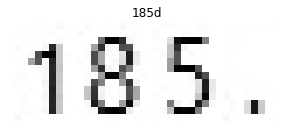

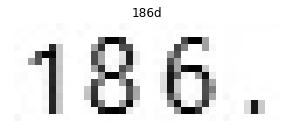

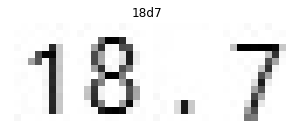

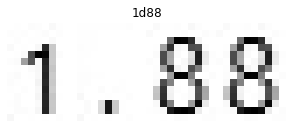

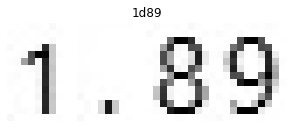

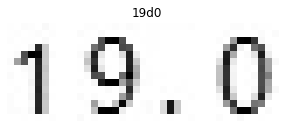

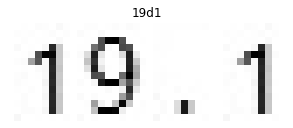

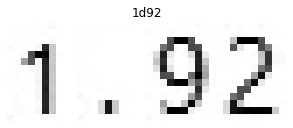

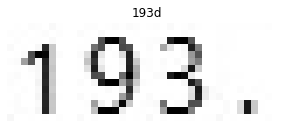

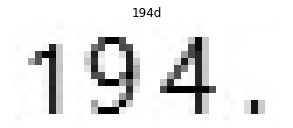

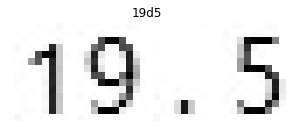

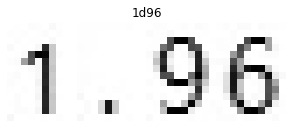

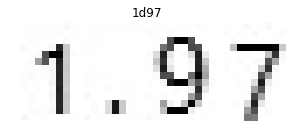

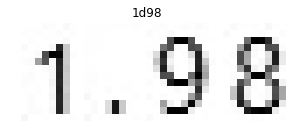

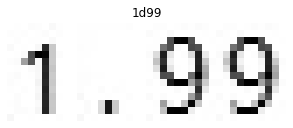

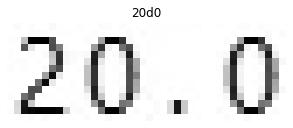

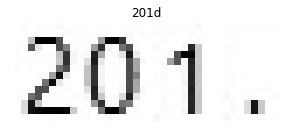

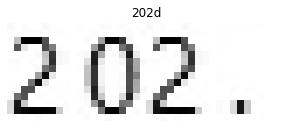

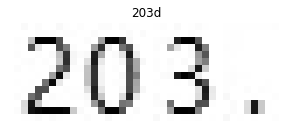

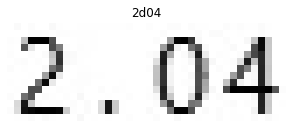

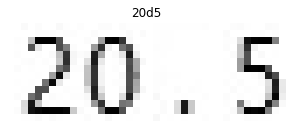

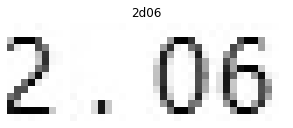

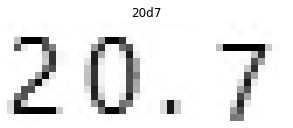

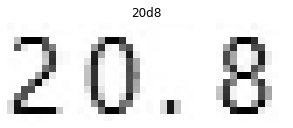

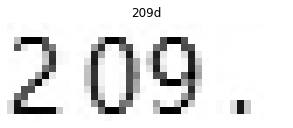

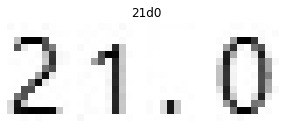

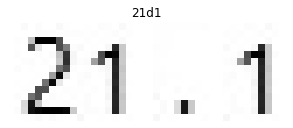

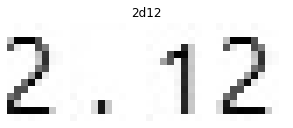

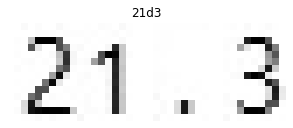

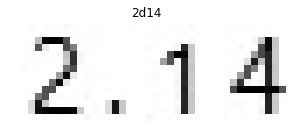

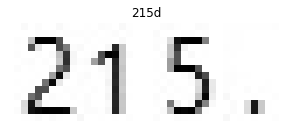

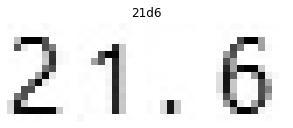

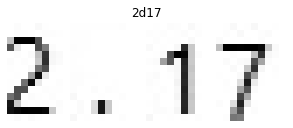

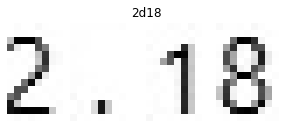

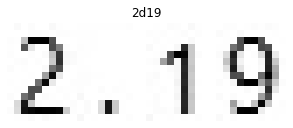

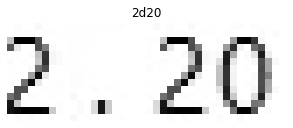

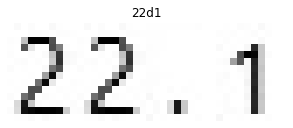

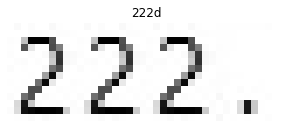

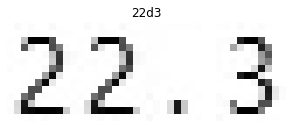

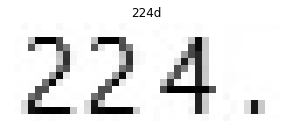

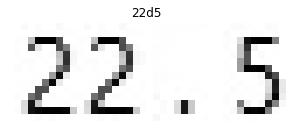

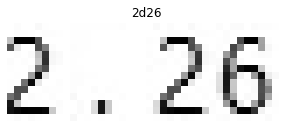

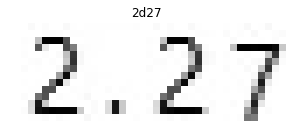

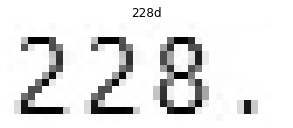

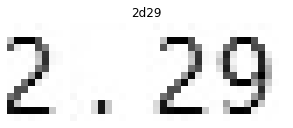

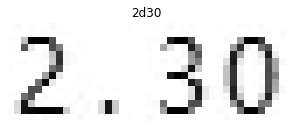

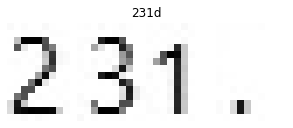

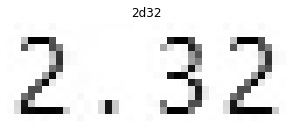

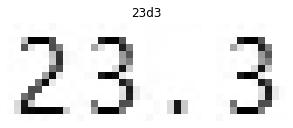

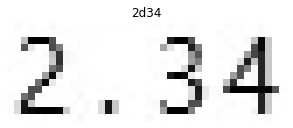

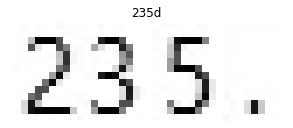

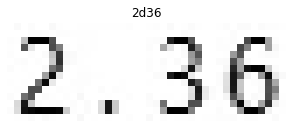

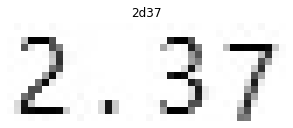

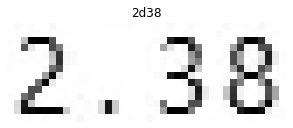

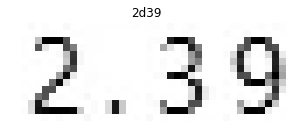

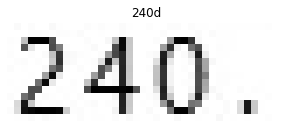

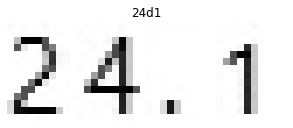

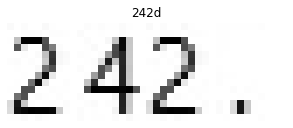

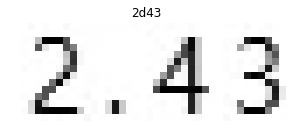

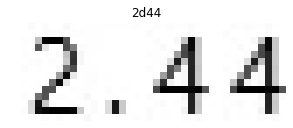

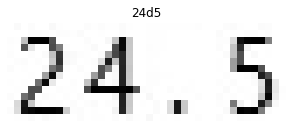

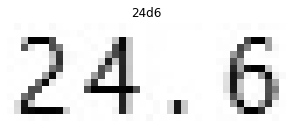

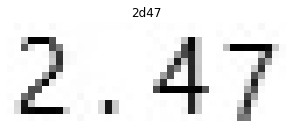

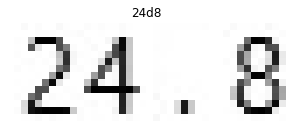

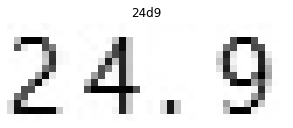

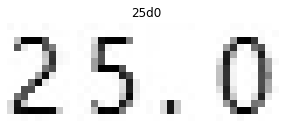

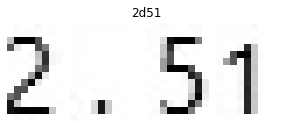

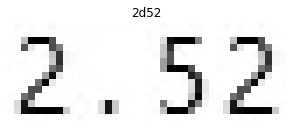

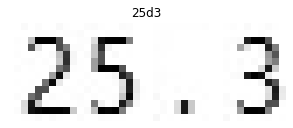

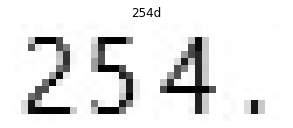

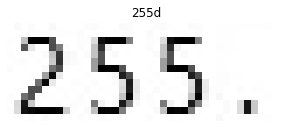

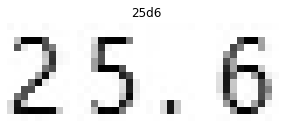

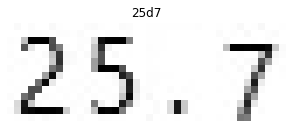

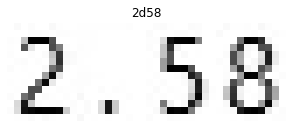

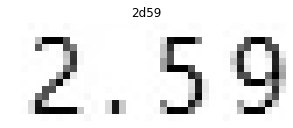

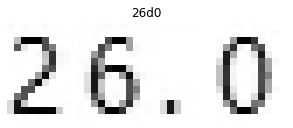

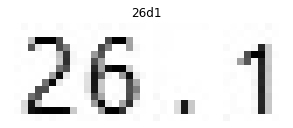

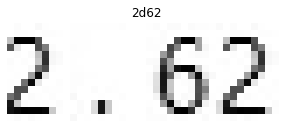

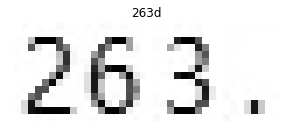

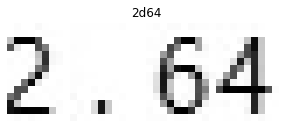

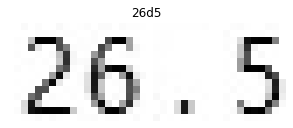

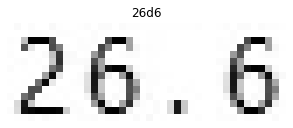

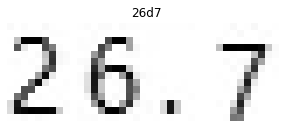

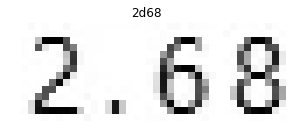

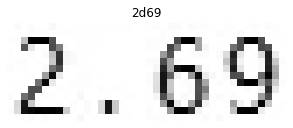

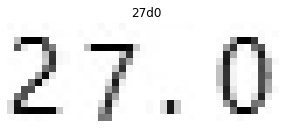

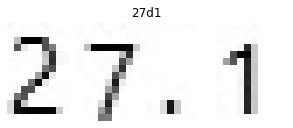

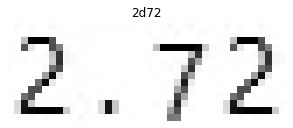

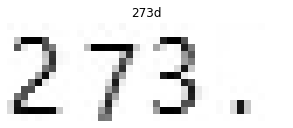

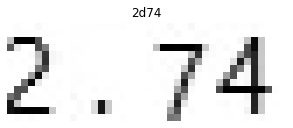

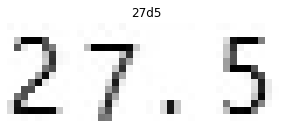

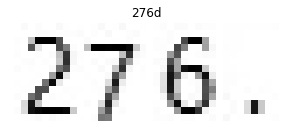

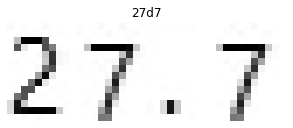

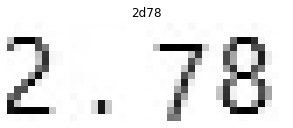

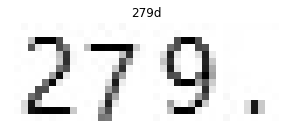

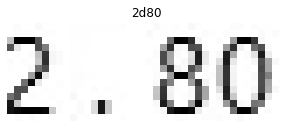

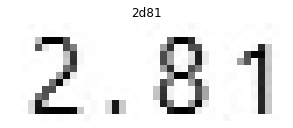

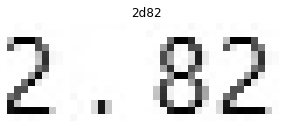

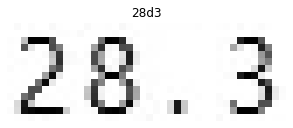

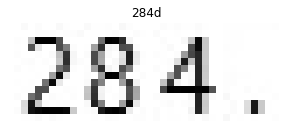

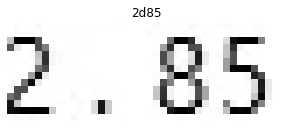

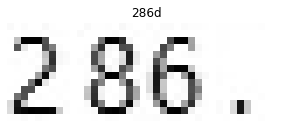

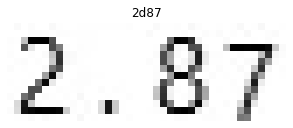

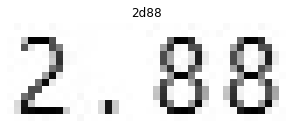

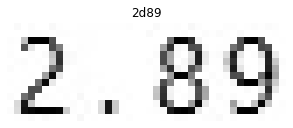

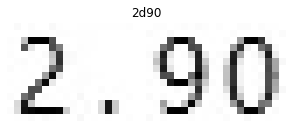

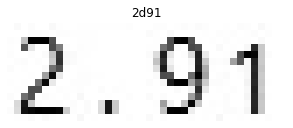

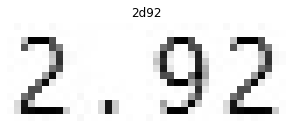

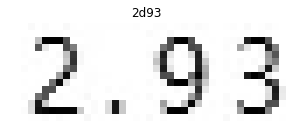

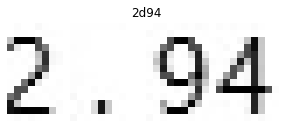

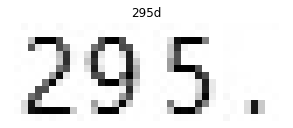

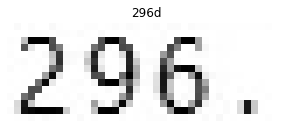

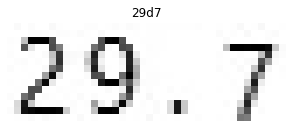

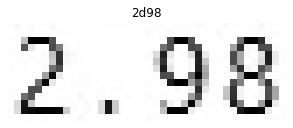

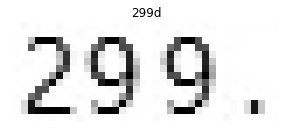

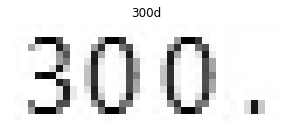

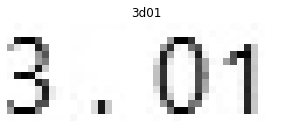

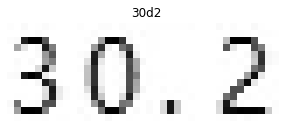

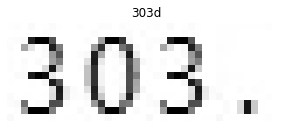

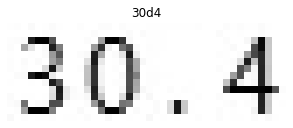

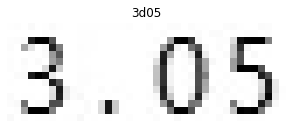

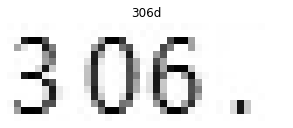

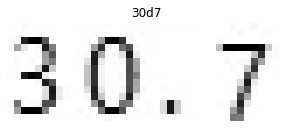

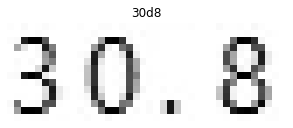

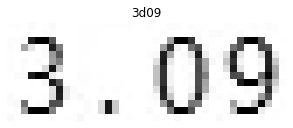

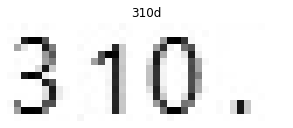

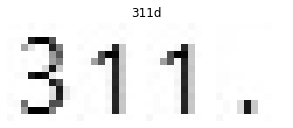

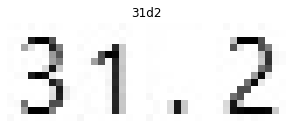

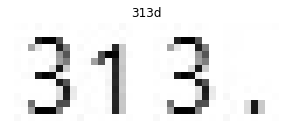

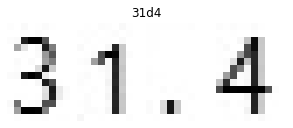

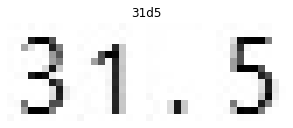

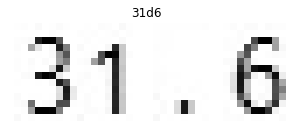

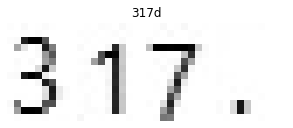

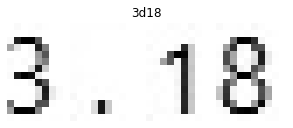

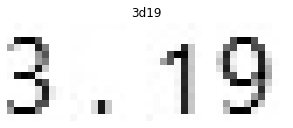

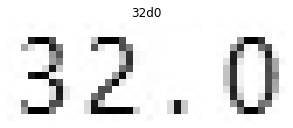

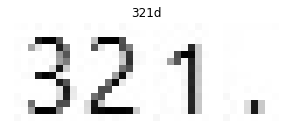

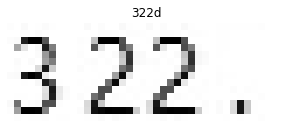

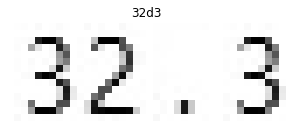

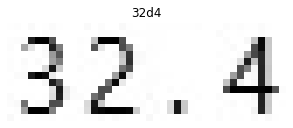

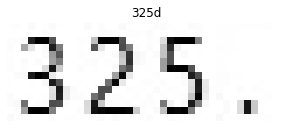

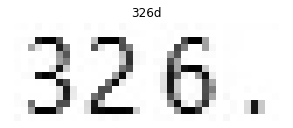

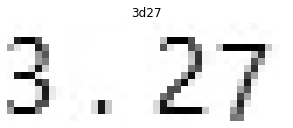

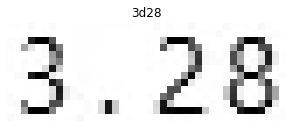

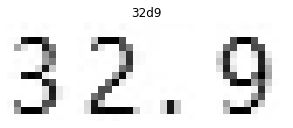

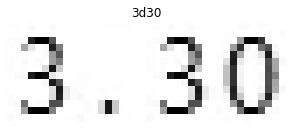

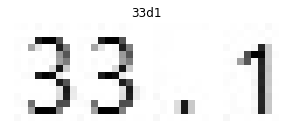

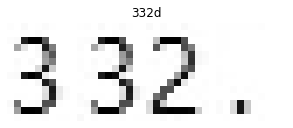

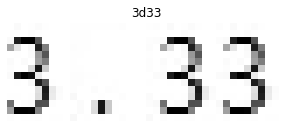

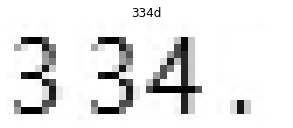

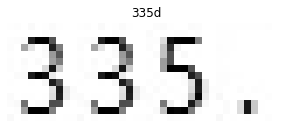

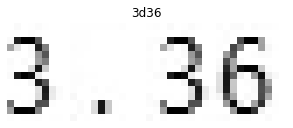

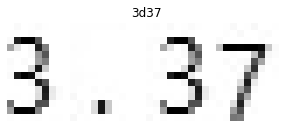

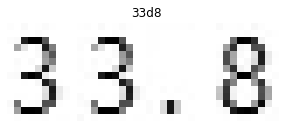

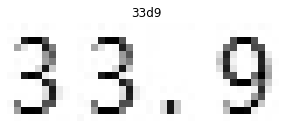

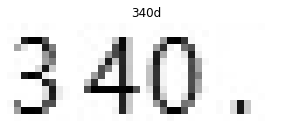

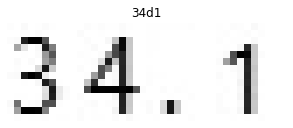

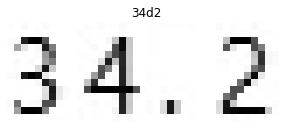

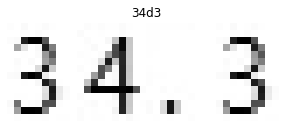

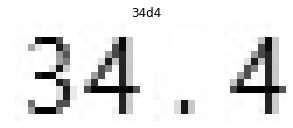

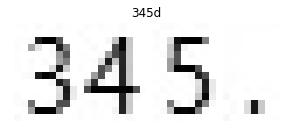

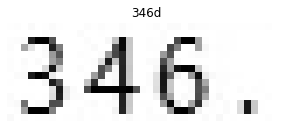

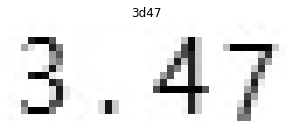

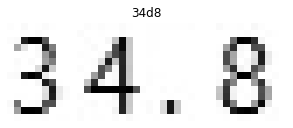

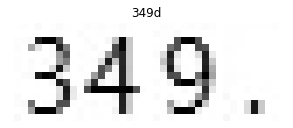

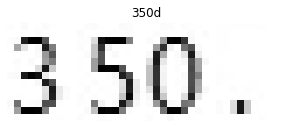

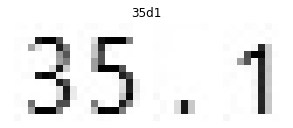

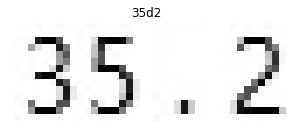

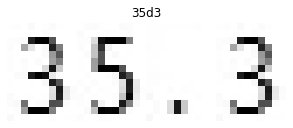

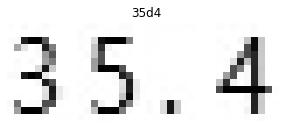

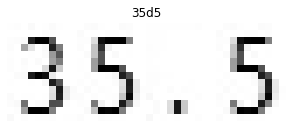

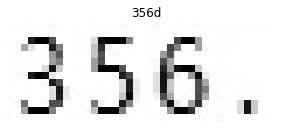

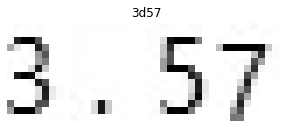

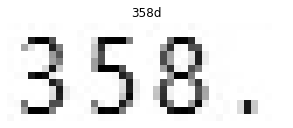

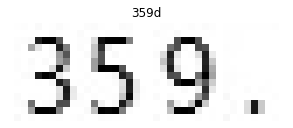

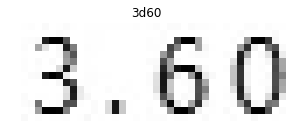

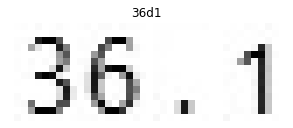

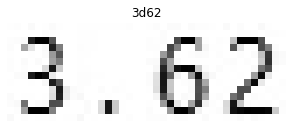

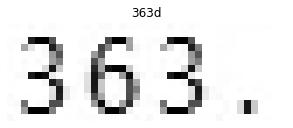

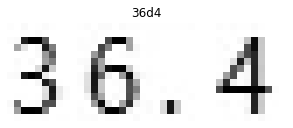

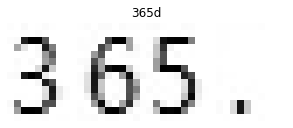

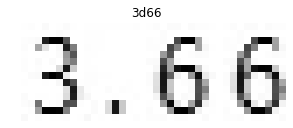

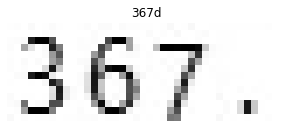

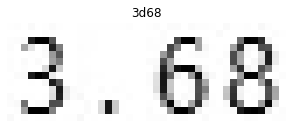

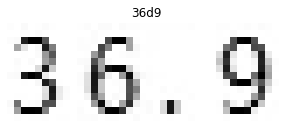

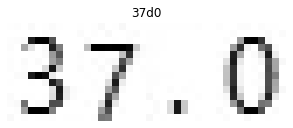

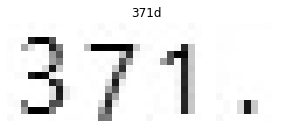

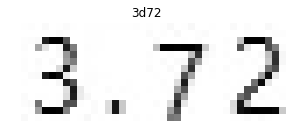

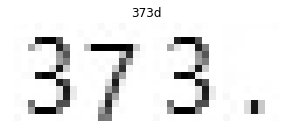

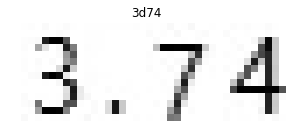

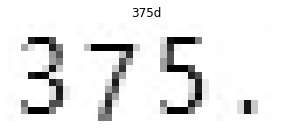

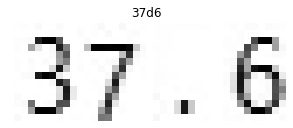

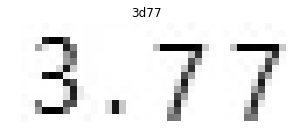

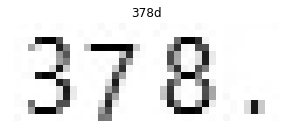

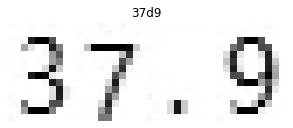

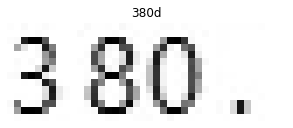

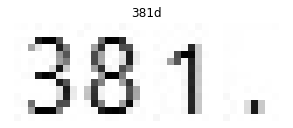

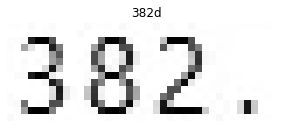

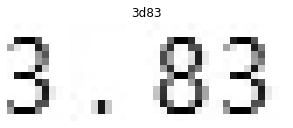

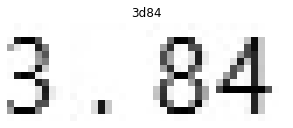

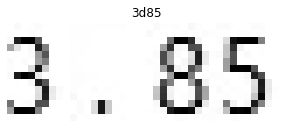

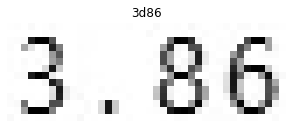

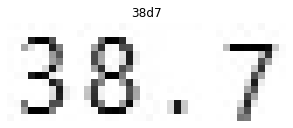

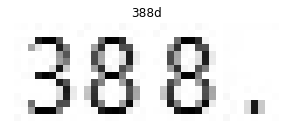

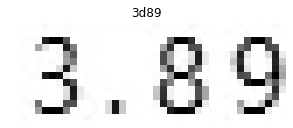

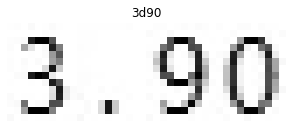

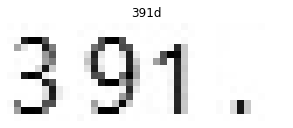

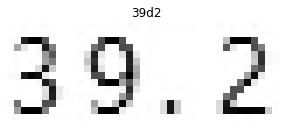

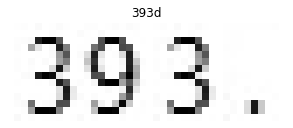

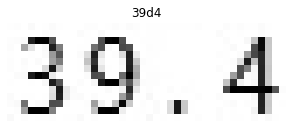

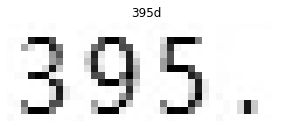

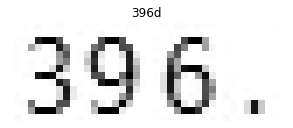

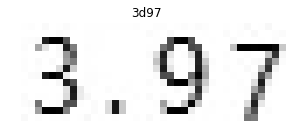

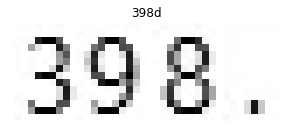

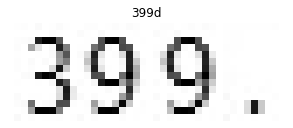

In [107]:
for img_ in font_triple_list[0][:300]:
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    plt.title(f'{img_.label}')
    axes.imshow(img_.img, 'gray')
    axes.axis('off')

In [108]:
%%time
triple_imgs = make_image(font_triple_list, save_list)

Wall time: 2min 33s


In [109]:
len(triple_imgs[0])

10800

In [110]:
save_imgs(triple_imgs, save_list)

0...
1...
2...


In [19]:
save_list

['./data/font/gothic/char',
 './data/font/gulim/char',
 './data/font/gungsuh/char']